# Preface

Hello,

My name is Mats De Clercq and this Jupyter notebook was made with the goal to explain the workflow of analyzing proteotypicity predictor scores. The reason I'm doing this is because it is part of my Master thesis and my research group (Compomics located in Ghent) would like to use these results to aid the current metaproteomics identification (and further down the line quantification) problem. There will be some references in this notebook and I will try to make everything that I used here available on github. This will not be a detailed explanation of the current hurdles surrounding metaproteomics analysis but I hope you can gain some insight in the code, making it possible to start looking deeper into this interesting field yourself.

Kind regards,

Mats

## Useful references to get you started

1) Muth T, Renard BY, Martens L (2016) Metaproteomic data analysis at a glance: advances in computational microbial community proteomics. Expert Rev Proteomics 13: 757–769.

2) Blackburn JM, Martens L (2016) The challenge of metaproteomic analysis in human samples. Expert Rev Proteomics 13: 135-138

## Gathering the data

The three preoteotypicity predictors that we use are CP-DT (in-house) [1] , DeepMSPeptide [2] and AP3 [3]. The database containing all the reference proteomes present in the SIHUMIx sample [4] will be used as a reference metaproteomics database.

1) Fannes T, Vandermarliere E, Schietgat L, Degroeve S, Martens L, Ramon J (2013) Predicting tryptic cleavage from proteomics data using decision tree ensembles. J Proteome Res 12: 2253–2259.

2) Serrano G, Guruceaga E, Segura V (2019) DeepMSPeptide: peptide detectability prediction using deep learning. Bioinformatics.

3) Gao Z, Chang C, Yang J, Zhu Y, Fu Y (2019) AP3: An Advanced Proteotypic Peptide Predictor for Targeted Proteomics by Incorporating Peptide Digestibility. Anal Chem.

4) Schäpe SS, Krause JL, Engelmann B, Fritz-Wallace K, Schattenberg F, Liu Z, Müller S, Jehmlich N, Rolle-Kampczyk U, Herberth G, et al. (2019) The simplified human intestinal microbiota (Sihumix) shows high structural and functional resistance against changing transit times in in vitro bioreactors. Microorganisms.

# CP-DT

For the CP-DT model a file is available in the directory 'CP-DT' on Github. This file should be used on a Linux platform ,it will not work using bash shell on a modern Windows because the file is quite old (I have problems because of the CPU architecture the original file is compiled in). Open the terminal and cd to the directory that contains CP-DT. Use the command 'cp-dt --help' to see the different paramaters you can adjust. 

Following is an example of how to use this:

*cp-dt --peptides --min-aa-number 6 --max-aa-number 30 --max-miscleavages 2 --fasta-file ./mats/SIHUMix.fasta  > ./mats/SIHUMIx.cpdt*

As you can see cp-dt takes fasta files and the output file will be 'SIHUMIx.cpdt'.

output example CP-DT:

MKRHVEIKWQDETLAVTLYVPELENQAETFPLIVICHGFIGSRIGVNRLFVETATQLIKDGYAVLCFDYVGCGESTGEYGRSGFDQLVAQTRHVLQEAAHFPEIDSQRISLL
GHSLGGPVALYTAISEPNIRKLMLWSPVAHPYKDIVRIVGVDTYQRAWQHTSVDYMGYGLTLAFFESLHSYVPLKELQKYTGDVFIAHGTADIDIPVEYCFHYYYAFRSRST
GKSDKEIILEADHTFSDGCSRTMLIDSTREWLSGERYYKQSGGAITRTIGYSI

PEPTIDE MKRHVEIK: 0.0183349

PEPTIDE RHVEIK: 0.0847898

PEPTIDE RHVEIKWQDETLAVTLYVPELENQAETFPLIVICHGFIGSR: 0.00917548

PEPTIDE HVEIKWQDETLAVTLYVPELENQAETFPLIVICHGFIGSR: 0.0854887

PEPTIDE HVEIKWQDETLAVTLYVPELENQAETFPLIVICHGFIGSRIGVNR: 0.0086859

# DeepMSPeptide

Download DeepMSPeptide here: https://github.com/vsegurar/DeepMSPeptide.

In the directory 'DeepMSPeptide' you will find a python script. To use this script you need to have Python 3.6.5 or above (stick to Python 3.6.5 because it will give problems in python 3.7.x or python 3.8.x) and Tensorflow 1.13.1 (don't use the newest version of TensorFlow stick with 1.13.1 but 2.0.0 worked for me). DeepMSPeptide only takes peptides as input so you can't use fasta files here. I used the peptides retrieved from the in silico cleavage of CP-DT and a script in the directory 
'DeepMSPeptide' to get these peptides will be available on github.

Example command line:

*python DeepMSPeptide.py path/to/Peptide_list_SIHUMIx.txt*

A file called Peptide_list_SIHUMIX_Predictions.txt will be made in the same directory as the Peptide list.

Output example DeepMSPeptide:

Peptide	Prob	Detectability

AAAAAAAAAAAAAAASSAGGAASTSAATAPATVPAYAGK	0.964686364	1

AAAAAAAAAAAAAAASSAGGAASTSAATAPATVPAYAGKK	0.91497517	1

AAAAAAAAAAAAAAASSAGGAASTSAATAPATVPAYAGKKPK	0.8730849	1

AAAAAAAAAAAANGAGSGAVTPTAAAR	0.84135649	1

AAAAAAAAAAAANGAGSGAVTPTAAAREGK	0.1436054	0

AAAAAAAAAAAANGAGSGAVTPTAAAREGKIGR	0.10965574	0

AAAAAAAAAAAGLATLPGQLIICAA	0.0040765	0

AAAAAAAAAAEQQK	0.78591686	1

AAAAAAAAAAEQQKR	0.82756782	1

AAAAAAAAAAEQQKRLER	0.00558627	0

AAAAAAAAGSNDMLEPELGR	0.83438534	1

AAAAAAAAGSNDMLEPELGRSSPVDLSTK	0.0653287	0

AAAAAAAAK	0.00071234	0

AAAAAAAAKAK	0.0001681	0

AAAAAAAAKAKNNK	5.394e-05	0



# AP3

Click on this link to download AP3: http://fugroup.amss.ac.cn/software/AP3/AP3.html. 

On the web page a user guide is available which you should follow because certain software needs to be installed. This predictor gave us a lot of problems because it can't handle the SIHUMIx database in one go. So what we did is split the dataset so that each part contained 1000 proteins (except the last one). On github you will also find a script called 'makeparamfiles.py' this script automates the whole process of making a parameter file for each slice of the database while also running the AP3.exe in terminal. The results of AP3 contain 5 text files with the most important one being 'DetectabilitiesOfPeptides.txt'.

Output example AP3:

Peptide sequence        Protein id	      Peptide detectability

WQDETLAVTLYVPELENQAETFPLIVICHGFIGSR	B_lat_ID_00001	0.095

LFVETATQLIK	B_lat_ID_00001	0.79

DGYAVLCFDYVGCGESTGEYGR	B_lat_ID_00001	0.725

SGFDQLVAQTR	B_lat_ID_00001	0.95
 
HVLQEAAHFPEIDSQR	B_lat_ID_00001	0.905

ISLLGHSLGGPVALYTAISEPNIR	B_lat_ID_00001	0.85

LMLWSPVAHPYK	B_lat_ID_00001	0.745

IVGVDTYQR	B_lat_ID_00001	0.89

AWQHTSVDYMGYGLTLAFFESLHSYVPLK	B_lat_ID_00001	0.395

YTGDVFIAHGTADIDIPVEYCFHYYYAFR	B_lat_ID_00001	0.385 

## Combining all of the results in one JSON file

So to be able to compare and analyze the results from these different predictors I made a script that creates a JSON file based on the following dictionary structure.

{ Protein_ID : { Peptide : { Predictor : score } } }

So the dictionary will contain all peptides for each protein ID and also the different scores from the predictors for each peptide. A python script called 'predictor_output_to_JSON.py' will be available on github with extra explanation inbetween the code. Adding the DeepMSPeptide results takes quite a long time (based on how large your dataset is) so beware.

# Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import json
import statistics

## First of all we open our json file and we make a dataframe from this data

In [2]:
with open('E:/Mats/CP-DT/proteotypicity_scores_SIHUMIx.txt', 'r') as file:
    data = json.load(file)

column_values = []
rows = []
for key in data:
    for key2 in data[key]:
        rows.append(key)
        rows.append(key2)
        try: 
            rows.append(float(data[key][key2]['CP-DT']))
        except KeyError:
            rows.append(np.nan)
        try:
            rows.append(float(data[key][key2]['DeepMSPeptide']))
        except KeyError:
            rows.append(np.nan)
        try: 
            rows.append(float(data[key][key2]['AP3']))
        except KeyError:
            rows.append(np.nan)
        
        column_values.append(rows)
        rows = []
                
        

column_names = ['Protein ID', 'Peptide', 'CP-DT score', 'DeepMS score', 'AP3 score']
df_database =  pd.DataFrame(column_values, columns = column_names) 
#del data
file.close()
df_database.head()

,Protein ID,Peptide,CP-DT score,DeepMS score,AP3 score
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,0.005453,0.001761,0.01500
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,0.049798,0.042643,0.43000
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,0.007944,0.000029,0.17250
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,0.125439,0.011918,0.56125
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,0.018249,0.121393,0.10500


## Adding columns containing the differences between the score for all three predictors

In [3]:
df_database['Difference CP-DT & AP3'] = abs(df_database['CP-DT score'] - df_database['AP3 score'])
df_database['Difference CP-DT & DeepMSPeptide'] = abs(df_database['CP-DT score'] - df_database['DeepMS score'])
df_database['Difference AP3 & DeepMSPeptide'] = abs(df_database['AP3 score'] - df_database['DeepMS score'])
#df_database_difscore = df_database.melt(id_vars = ['Peptide'], value_vars = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'])

df_database.head()

,Protein ID,Peptide,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


## Adding a 'length' column 

In [4]:
lengths = []
groter_30 = 0
kleiner_8 = 0
#database
for peptide in df_database['Peptide']:
    if 8 <= len(peptide) <= 10:
        lengths.append('08-10 AA')
    elif 10 < len(peptide) <= 13:
        lengths.append('11-13 AA')
    elif 13 < len(peptide) <= 16:
        lengths.append('14-16 AA')
    elif 16 < len(peptide) <= 19:
        lengths.append('17-19 AA')
    elif 19 < len(peptide) <= 22:
        lengths.append('20-22 AA')
    elif 22 < len(peptide) <= 25:
        lengths.append('23-25 AA')
    elif 25 < len(peptide) <= 28:
        lengths.append('26-28 AA')
    elif 28 < len(peptide) <= 30:
        lengths.append('28-30 AA')
    if len(peptide) > 30:
        lengths.append(0)
    if len(peptide) < 8:
        lengths.append(0)


df_database.insert(2, 'length', lengths)

df_database.head()


,Protein ID,Peptide,length,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,11-13 AA,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,11-13 AA,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,14-16 AA,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,08-10 AA,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,11-13 AA,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


## Adding a 'Missed cleavages' column

In [5]:
missed_cleavage = 0
mc_list = []

for peptide in df_database['Peptide']:
    for index, character in enumerate(peptide):
        if index == len(peptide) - 1:
            pass
        
        elif character == 'R':
            missed_cleavage += 1
        elif character == 'K':
            missed_cleavage += 1
            
    mc_list.append(missed_cleavage)
    missed_cleavage = 0
    
#del df_database['Missed Cleavages']
df_database.insert(2, 'Missed Cleavages', mc_list)
df_database.head()

,Protein ID,Peptide,Missed Cleavages,length,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,2,11-13 AA,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,1,11-13 AA,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,2,14-16 AA,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,1,08-10 AA,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,2,11-13 AA,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


## Adding a 'Hydrophobicity' column 

In [6]:
#Kyte-Doolittle scale is an old scale but widely used and a positive value means hydrophobic 
hydro_dict = {'A': 1.800, 'R' : -4.500, 'N' : -3.500, 'D' : -3.500, 'C': 2.500, 
'E' : -3.500,'Q' : -3.500, 'G' : -0.400, 'H' : -3.200,'I' : 4.500,
'L' : 3.800,'K' : -3.900,'M' : 1.900,'F' : 2.800,'P' : -1.600,
'S' : -0.800  ,'T' : -0.700,'W' : -0.900,'Y' : -1.300,'V' : 4.200}

Hydrophobicity = 0
Hydro_list = []
for peptide in df_database['Peptide']:
    for character in peptide:
        if character in hydro_dict:
            Hydrophobicity += hydro_dict[character]
    
    Hydro_list.append(Hydrophobicity)
    Hydrophobicity = 0

df_database.insert(2, 'Hydrophobicity', Hydro_list)
df_database.head()

,Protein ID,Peptide,Hydrophobicity,Missed Cleavages,length,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
0,tr|B0MEB3|B0MEB3_9FIRM,MREESYREALMTK,-16.8,2,11-13 AA,0.005453,0.001761,0.01500,0.009547,0.003692,0.013239
1,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTK,-14.2,1,11-13 AA,0.049798,0.042643,0.43000,0.380202,0.007154,0.387357
2,tr|B0MEB3|B0MEB3_9FIRM,EESYREALMTKQEEK,-28.6,2,14-16 AA,0.007944,0.000029,0.17250,0.164556,0.007915,0.172471
3,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEK,-15.0,1,08-10 AA,0.125439,0.011918,0.56125,0.435811,0.113521,0.549332
4,tr|B0MEB3|B0MEB3_9FIRM,EALMTKQEEKR,-19.5,2,11-13 AA,0.018249,0.121393,0.10500,0.086751,0.103144,0.016393


# Changing the headers (Protein ID column) so we are able to determine the amount of identified peptides in the next step

In [7]:
map_dict = dict()
for protid in df_database['Protein ID']:
    try:
        new_protid = protid.split('|')[1]
    except IndexError:
        new_protid = protid.split('|')[0]
    
    map_dict[protid] = new_protid
    
prot_col = df_database[df_database.columns[0]]
del df_database['Protein ID']

new_prot_col = prot_col.map(map_dict)

df_database.insert(0, 'Protein ID', new_prot_col)


In [8]:
df_database.tail()

,Protein ID,Peptide,Hydrophobicity,Missed Cleavages,length,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
1760949,KKA1_ECOLX,YGIDNPDMNK,-14.8,0,08-10 AA,0.881316,0.776180,0.920,0.038684,0.105136,0.143820
1760950,KKA1_ECOLX,YGIDNPDMNKLQFHLMLDEFF,-6.8,1,20-22 AA,0.031368,0.000001,0.230,0.198632,0.031366,0.229999
1760951,KKA1_ECOLX,LQFHLMLDEFF,8.0,0,11-13 AA,0.965631,0.000071,0.885,0.080631,0.965560,0.884929
1760952,KKA1_ECOLX,SHIQRETSCSR,-15.3,1,11-13 AA,NaN,NaN,0.160,NaN,NaN,NaN
1760953,KKA1_ECOLX,SHIQRETSCSRPR,-21.4,2,11-13 AA,NaN,NaN,0.025,NaN,NaN,NaN


## Making a dataframe of all the scores for the identified peptides using SearchGUI/Peptideshaker

In [9]:
proteom_analysis = pd.read_excel('E:\Mats\SearchGUI_results\PSM_SIHUMIx_no_refinement.xls')
headers = list(proteom_analysis['Protein(s)'])
iden_pept = list(proteom_analysis['Sequence'])
head_seq = list(zip(headers,iden_pept))
df_idenpep = pd.DataFrame()
index = 0

for header, seq in head_seq:
    try:
        df_idenpep = df_idenpep.append(df_database[df_database['Protein ID'] == header][df_database['Peptide'] == seq])
    except:
        continue
    index += 1
    print(f'done with {index}/17698')
    
print(len(iden_pept), df_idenpep.shape)

C:\Users\compomics\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


done with 1/17698
done with 2/17698
done with 3/17698
done with 4/17698
done with 5/17698
done with 6/17698
done with 7/17698
done with 8/17698
done with 9/17698
done with 10/17698
done with 11/17698
done with 12/17698
done with 13/17698
done with 14/17698
done with 15/17698
done with 16/17698
done with 17/17698
done with 18/17698
done with 19/17698
done with 20/17698
done with 21/17698
done with 22/17698
done with 23/17698
done with 24/17698
done with 25/17698
done with 26/17698
done with 27/17698
done with 28/17698
done with 29/17698
done with 30/17698
done with 31/17698
done with 32/17698
done with 33/17698
done with 34/17698
done with 35/17698
done with 36/17698
done with 37/17698
done with 38/17698
done with 39/17698
done with 40/17698
done with 41/17698
done with 42/17698
done with 43/17698
done with 44/17698
done with 45/17698
done with 46/17698
done with 47/17698
done with 48/17698
done with 49/17698
done with 50/17698
done with 51/17698
done with 52/17698
done with 53/17698
do

done with 417/17698
done with 418/17698
done with 419/17698
done with 420/17698
done with 421/17698
done with 422/17698
done with 423/17698
done with 424/17698
done with 425/17698
done with 426/17698
done with 427/17698
done with 428/17698
done with 429/17698
done with 430/17698
done with 431/17698
done with 432/17698
done with 433/17698
done with 434/17698
done with 435/17698
done with 436/17698
done with 437/17698
done with 438/17698
done with 439/17698
done with 440/17698
done with 441/17698
done with 442/17698
done with 443/17698
done with 444/17698
done with 445/17698
done with 446/17698
done with 447/17698
done with 448/17698
done with 449/17698
done with 450/17698
done with 451/17698
done with 452/17698
done with 453/17698
done with 454/17698
done with 455/17698
done with 456/17698
done with 457/17698
done with 458/17698
done with 459/17698
done with 460/17698
done with 461/17698
done with 462/17698
done with 463/17698
done with 464/17698
done with 465/17698
done with 466/17698


done with 827/17698
done with 828/17698
done with 829/17698
done with 830/17698
done with 831/17698
done with 832/17698
done with 833/17698
done with 834/17698
done with 835/17698
done with 836/17698
done with 837/17698
done with 838/17698
done with 839/17698
done with 840/17698
done with 841/17698
done with 842/17698
done with 843/17698
done with 844/17698
done with 845/17698
done with 846/17698
done with 847/17698
done with 848/17698
done with 849/17698
done with 850/17698
done with 851/17698
done with 852/17698
done with 853/17698
done with 854/17698
done with 855/17698
done with 856/17698
done with 857/17698
done with 858/17698
done with 859/17698
done with 860/17698
done with 861/17698
done with 862/17698
done with 863/17698
done with 864/17698
done with 865/17698
done with 866/17698
done with 867/17698
done with 868/17698
done with 869/17698
done with 870/17698
done with 871/17698
done with 872/17698
done with 873/17698
done with 874/17698
done with 875/17698
done with 876/17698


done with 1226/17698
done with 1227/17698
done with 1228/17698
done with 1229/17698
done with 1230/17698
done with 1231/17698
done with 1232/17698
done with 1233/17698
done with 1234/17698
done with 1235/17698
done with 1236/17698
done with 1237/17698
done with 1238/17698
done with 1239/17698
done with 1240/17698
done with 1241/17698
done with 1242/17698
done with 1243/17698
done with 1244/17698
done with 1245/17698
done with 1246/17698
done with 1247/17698
done with 1248/17698
done with 1249/17698
done with 1250/17698
done with 1251/17698
done with 1252/17698
done with 1253/17698
done with 1254/17698
done with 1255/17698
done with 1256/17698
done with 1257/17698
done with 1258/17698
done with 1259/17698
done with 1260/17698
done with 1261/17698
done with 1262/17698
done with 1263/17698
done with 1264/17698
done with 1265/17698
done with 1266/17698
done with 1267/17698
done with 1268/17698
done with 1269/17698
done with 1270/17698
done with 1271/17698
done with 1272/17698
done with 127

done with 1617/17698
done with 1618/17698
done with 1619/17698
done with 1620/17698
done with 1621/17698
done with 1622/17698
done with 1623/17698
done with 1624/17698
done with 1625/17698
done with 1626/17698
done with 1627/17698
done with 1628/17698
done with 1629/17698
done with 1630/17698
done with 1631/17698
done with 1632/17698
done with 1633/17698
done with 1634/17698
done with 1635/17698
done with 1636/17698
done with 1637/17698
done with 1638/17698
done with 1639/17698
done with 1640/17698
done with 1641/17698
done with 1642/17698
done with 1643/17698
done with 1644/17698
done with 1645/17698
done with 1646/17698
done with 1647/17698
done with 1648/17698
done with 1649/17698
done with 1650/17698
done with 1651/17698
done with 1652/17698
done with 1653/17698
done with 1654/17698
done with 1655/17698
done with 1656/17698
done with 1657/17698
done with 1658/17698
done with 1659/17698
done with 1660/17698
done with 1661/17698
done with 1662/17698
done with 1663/17698
done with 166

done with 2008/17698
done with 2009/17698
done with 2010/17698
done with 2011/17698
done with 2012/17698
done with 2013/17698
done with 2014/17698
done with 2015/17698
done with 2016/17698
done with 2017/17698
done with 2018/17698
done with 2019/17698
done with 2020/17698
done with 2021/17698
done with 2022/17698
done with 2023/17698
done with 2024/17698
done with 2025/17698
done with 2026/17698
done with 2027/17698
done with 2028/17698
done with 2029/17698
done with 2030/17698
done with 2031/17698
done with 2032/17698
done with 2033/17698
done with 2034/17698
done with 2035/17698
done with 2036/17698
done with 2037/17698
done with 2038/17698
done with 2039/17698
done with 2040/17698
done with 2041/17698
done with 2042/17698
done with 2043/17698
done with 2044/17698
done with 2045/17698
done with 2046/17698
done with 2047/17698
done with 2048/17698
done with 2049/17698
done with 2050/17698
done with 2051/17698
done with 2052/17698
done with 2053/17698
done with 2054/17698
done with 205

done with 2399/17698
done with 2400/17698
done with 2401/17698
done with 2402/17698
done with 2403/17698
done with 2404/17698
done with 2405/17698
done with 2406/17698
done with 2407/17698
done with 2408/17698
done with 2409/17698
done with 2410/17698
done with 2411/17698
done with 2412/17698
done with 2413/17698
done with 2414/17698
done with 2415/17698
done with 2416/17698
done with 2417/17698
done with 2418/17698
done with 2419/17698
done with 2420/17698
done with 2421/17698
done with 2422/17698
done with 2423/17698
done with 2424/17698
done with 2425/17698
done with 2426/17698
done with 2427/17698
done with 2428/17698
done with 2429/17698
done with 2430/17698
done with 2431/17698
done with 2432/17698
done with 2433/17698
done with 2434/17698
done with 2435/17698
done with 2436/17698
done with 2437/17698
done with 2438/17698
done with 2439/17698
done with 2440/17698
done with 2441/17698
done with 2442/17698
done with 2443/17698
done with 2444/17698
done with 2445/17698
done with 244

done with 2790/17698
done with 2791/17698
done with 2792/17698
done with 2793/17698
done with 2794/17698
done with 2795/17698
done with 2796/17698
done with 2797/17698
done with 2798/17698
done with 2799/17698
done with 2800/17698
done with 2801/17698
done with 2802/17698
done with 2803/17698
done with 2804/17698
done with 2805/17698
done with 2806/17698
done with 2807/17698
done with 2808/17698
done with 2809/17698
done with 2810/17698
done with 2811/17698
done with 2812/17698
done with 2813/17698
done with 2814/17698
done with 2815/17698
done with 2816/17698
done with 2817/17698
done with 2818/17698
done with 2819/17698
done with 2820/17698
done with 2821/17698
done with 2822/17698
done with 2823/17698
done with 2824/17698
done with 2825/17698
done with 2826/17698
done with 2827/17698
done with 2828/17698
done with 2829/17698
done with 2830/17698
done with 2831/17698
done with 2832/17698
done with 2833/17698
done with 2834/17698
done with 2835/17698
done with 2836/17698
done with 283

done with 3181/17698
done with 3182/17698
done with 3183/17698
done with 3184/17698
done with 3185/17698
done with 3186/17698
done with 3187/17698
done with 3188/17698
done with 3189/17698
done with 3190/17698
done with 3191/17698
done with 3192/17698
done with 3193/17698
done with 3194/17698
done with 3195/17698
done with 3196/17698
done with 3197/17698
done with 3198/17698
done with 3199/17698
done with 3200/17698
done with 3201/17698
done with 3202/17698
done with 3203/17698
done with 3204/17698
done with 3205/17698
done with 3206/17698
done with 3207/17698
done with 3208/17698
done with 3209/17698
done with 3210/17698
done with 3211/17698
done with 3212/17698
done with 3213/17698
done with 3214/17698
done with 3215/17698
done with 3216/17698
done with 3217/17698
done with 3218/17698
done with 3219/17698
done with 3220/17698
done with 3221/17698
done with 3222/17698
done with 3223/17698
done with 3224/17698
done with 3225/17698
done with 3226/17698
done with 3227/17698
done with 322

done with 3572/17698
done with 3573/17698
done with 3574/17698
done with 3575/17698
done with 3576/17698
done with 3577/17698
done with 3578/17698
done with 3579/17698
done with 3580/17698
done with 3581/17698
done with 3582/17698
done with 3583/17698
done with 3584/17698
done with 3585/17698
done with 3586/17698
done with 3587/17698
done with 3588/17698
done with 3589/17698
done with 3590/17698
done with 3591/17698
done with 3592/17698
done with 3593/17698
done with 3594/17698
done with 3595/17698
done with 3596/17698
done with 3597/17698
done with 3598/17698
done with 3599/17698
done with 3600/17698
done with 3601/17698
done with 3602/17698
done with 3603/17698
done with 3604/17698
done with 3605/17698
done with 3606/17698
done with 3607/17698
done with 3608/17698
done with 3609/17698
done with 3610/17698
done with 3611/17698
done with 3612/17698
done with 3613/17698
done with 3614/17698
done with 3615/17698
done with 3616/17698
done with 3617/17698
done with 3618/17698
done with 361

done with 3963/17698
done with 3964/17698
done with 3965/17698
done with 3966/17698
done with 3967/17698
done with 3968/17698
done with 3969/17698
done with 3970/17698
done with 3971/17698
done with 3972/17698
done with 3973/17698
done with 3974/17698
done with 3975/17698
done with 3976/17698
done with 3977/17698
done with 3978/17698
done with 3979/17698
done with 3980/17698
done with 3981/17698
done with 3982/17698
done with 3983/17698
done with 3984/17698
done with 3985/17698
done with 3986/17698
done with 3987/17698
done with 3988/17698
done with 3989/17698
done with 3990/17698
done with 3991/17698
done with 3992/17698
done with 3993/17698
done with 3994/17698
done with 3995/17698
done with 3996/17698
done with 3997/17698
done with 3998/17698
done with 3999/17698
done with 4000/17698
done with 4001/17698
done with 4002/17698
done with 4003/17698
done with 4004/17698
done with 4005/17698
done with 4006/17698
done with 4007/17698
done with 4008/17698
done with 4009/17698
done with 401

done with 4354/17698
done with 4355/17698
done with 4356/17698
done with 4357/17698
done with 4358/17698
done with 4359/17698
done with 4360/17698
done with 4361/17698
done with 4362/17698
done with 4363/17698
done with 4364/17698
done with 4365/17698
done with 4366/17698
done with 4367/17698
done with 4368/17698
done with 4369/17698
done with 4370/17698
done with 4371/17698
done with 4372/17698
done with 4373/17698
done with 4374/17698
done with 4375/17698
done with 4376/17698
done with 4377/17698
done with 4378/17698
done with 4379/17698
done with 4380/17698
done with 4381/17698
done with 4382/17698
done with 4383/17698
done with 4384/17698
done with 4385/17698
done with 4386/17698
done with 4387/17698
done with 4388/17698
done with 4389/17698
done with 4390/17698
done with 4391/17698
done with 4392/17698
done with 4393/17698
done with 4394/17698
done with 4395/17698
done with 4396/17698
done with 4397/17698
done with 4398/17698
done with 4399/17698
done with 4400/17698
done with 440

done with 4745/17698
done with 4746/17698
done with 4747/17698
done with 4748/17698
done with 4749/17698
done with 4750/17698
done with 4751/17698
done with 4752/17698
done with 4753/17698
done with 4754/17698
done with 4755/17698
done with 4756/17698
done with 4757/17698
done with 4758/17698
done with 4759/17698
done with 4760/17698
done with 4761/17698
done with 4762/17698
done with 4763/17698
done with 4764/17698
done with 4765/17698
done with 4766/17698
done with 4767/17698
done with 4768/17698
done with 4769/17698
done with 4770/17698
done with 4771/17698
done with 4772/17698
done with 4773/17698
done with 4774/17698
done with 4775/17698
done with 4776/17698
done with 4777/17698
done with 4778/17698
done with 4779/17698
done with 4780/17698
done with 4781/17698
done with 4782/17698
done with 4783/17698
done with 4784/17698
done with 4785/17698
done with 4786/17698
done with 4787/17698
done with 4788/17698
done with 4789/17698
done with 4790/17698
done with 4791/17698
done with 479

done with 5136/17698
done with 5137/17698
done with 5138/17698
done with 5139/17698
done with 5140/17698
done with 5141/17698
done with 5142/17698
done with 5143/17698
done with 5144/17698
done with 5145/17698
done with 5146/17698
done with 5147/17698
done with 5148/17698
done with 5149/17698
done with 5150/17698
done with 5151/17698
done with 5152/17698
done with 5153/17698
done with 5154/17698
done with 5155/17698
done with 5156/17698
done with 5157/17698
done with 5158/17698
done with 5159/17698
done with 5160/17698
done with 5161/17698
done with 5162/17698
done with 5163/17698
done with 5164/17698
done with 5165/17698
done with 5166/17698
done with 5167/17698
done with 5168/17698
done with 5169/17698
done with 5170/17698
done with 5171/17698
done with 5172/17698
done with 5173/17698
done with 5174/17698
done with 5175/17698
done with 5176/17698
done with 5177/17698
done with 5178/17698
done with 5179/17698
done with 5180/17698
done with 5181/17698
done with 5182/17698
done with 518

done with 5527/17698
done with 5528/17698
done with 5529/17698
done with 5530/17698
done with 5531/17698
done with 5532/17698
done with 5533/17698
done with 5534/17698
done with 5535/17698
done with 5536/17698
done with 5537/17698
done with 5538/17698
done with 5539/17698
done with 5540/17698
done with 5541/17698
done with 5542/17698
done with 5543/17698
done with 5544/17698
done with 5545/17698
done with 5546/17698
done with 5547/17698
done with 5548/17698
done with 5549/17698
done with 5550/17698
done with 5551/17698
done with 5552/17698
done with 5553/17698
done with 5554/17698
done with 5555/17698
done with 5556/17698
done with 5557/17698
done with 5558/17698
done with 5559/17698
done with 5560/17698
done with 5561/17698
done with 5562/17698
done with 5563/17698
done with 5564/17698
done with 5565/17698
done with 5566/17698
done with 5567/17698
done with 5568/17698
done with 5569/17698
done with 5570/17698
done with 5571/17698
done with 5572/17698
done with 5573/17698
done with 557

done with 5918/17698
done with 5919/17698
done with 5920/17698
done with 5921/17698
done with 5922/17698
done with 5923/17698
done with 5924/17698
done with 5925/17698
done with 5926/17698
done with 5927/17698
done with 5928/17698
done with 5929/17698
done with 5930/17698
done with 5931/17698
done with 5932/17698
done with 5933/17698
done with 5934/17698
done with 5935/17698
done with 5936/17698
done with 5937/17698
done with 5938/17698
done with 5939/17698
done with 5940/17698
done with 5941/17698
done with 5942/17698
done with 5943/17698
done with 5944/17698
done with 5945/17698
done with 5946/17698
done with 5947/17698
done with 5948/17698
done with 5949/17698
done with 5950/17698
done with 5951/17698
done with 5952/17698
done with 5953/17698
done with 5954/17698
done with 5955/17698
done with 5956/17698
done with 5957/17698
done with 5958/17698
done with 5959/17698
done with 5960/17698
done with 5961/17698
done with 5962/17698
done with 5963/17698
done with 5964/17698
done with 596

done with 6309/17698
done with 6310/17698
done with 6311/17698
done with 6312/17698
done with 6313/17698
done with 6314/17698
done with 6315/17698
done with 6316/17698
done with 6317/17698
done with 6318/17698
done with 6319/17698
done with 6320/17698
done with 6321/17698
done with 6322/17698
done with 6323/17698
done with 6324/17698
done with 6325/17698
done with 6326/17698
done with 6327/17698
done with 6328/17698
done with 6329/17698
done with 6330/17698
done with 6331/17698
done with 6332/17698
done with 6333/17698
done with 6334/17698
done with 6335/17698
done with 6336/17698
done with 6337/17698
done with 6338/17698
done with 6339/17698
done with 6340/17698
done with 6341/17698
done with 6342/17698
done with 6343/17698
done with 6344/17698
done with 6345/17698
done with 6346/17698
done with 6347/17698
done with 6348/17698
done with 6349/17698
done with 6350/17698
done with 6351/17698
done with 6352/17698
done with 6353/17698
done with 6354/17698
done with 6355/17698
done with 635

done with 6700/17698
done with 6701/17698
done with 6702/17698
done with 6703/17698
done with 6704/17698
done with 6705/17698
done with 6706/17698
done with 6707/17698
done with 6708/17698
done with 6709/17698
done with 6710/17698
done with 6711/17698
done with 6712/17698
done with 6713/17698
done with 6714/17698
done with 6715/17698
done with 6716/17698
done with 6717/17698
done with 6718/17698
done with 6719/17698
done with 6720/17698
done with 6721/17698
done with 6722/17698
done with 6723/17698
done with 6724/17698
done with 6725/17698
done with 6726/17698
done with 6727/17698
done with 6728/17698
done with 6729/17698
done with 6730/17698
done with 6731/17698
done with 6732/17698
done with 6733/17698
done with 6734/17698
done with 6735/17698
done with 6736/17698
done with 6737/17698
done with 6738/17698
done with 6739/17698
done with 6740/17698
done with 6741/17698
done with 6742/17698
done with 6743/17698
done with 6744/17698
done with 6745/17698
done with 6746/17698
done with 674

done with 7091/17698
done with 7092/17698
done with 7093/17698
done with 7094/17698
done with 7095/17698
done with 7096/17698
done with 7097/17698
done with 7098/17698
done with 7099/17698
done with 7100/17698
done with 7101/17698
done with 7102/17698
done with 7103/17698
done with 7104/17698
done with 7105/17698
done with 7106/17698
done with 7107/17698
done with 7108/17698
done with 7109/17698
done with 7110/17698
done with 7111/17698
done with 7112/17698
done with 7113/17698
done with 7114/17698
done with 7115/17698
done with 7116/17698
done with 7117/17698
done with 7118/17698
done with 7119/17698
done with 7120/17698
done with 7121/17698
done with 7122/17698
done with 7123/17698
done with 7124/17698
done with 7125/17698
done with 7126/17698
done with 7127/17698
done with 7128/17698
done with 7129/17698
done with 7130/17698
done with 7131/17698
done with 7132/17698
done with 7133/17698
done with 7134/17698
done with 7135/17698
done with 7136/17698
done with 7137/17698
done with 713

done with 7482/17698
done with 7483/17698
done with 7484/17698
done with 7485/17698
done with 7486/17698
done with 7487/17698
done with 7488/17698
done with 7489/17698
done with 7490/17698
done with 7491/17698
done with 7492/17698
done with 7493/17698
done with 7494/17698
done with 7495/17698
done with 7496/17698
done with 7497/17698
done with 7498/17698
done with 7499/17698
done with 7500/17698
done with 7501/17698
done with 7502/17698
done with 7503/17698
done with 7504/17698
done with 7505/17698
done with 7506/17698
done with 7507/17698
done with 7508/17698
done with 7509/17698
done with 7510/17698
done with 7511/17698
done with 7512/17698
done with 7513/17698
done with 7514/17698
done with 7515/17698
done with 7516/17698
done with 7517/17698
done with 7518/17698
done with 7519/17698
done with 7520/17698
done with 7521/17698
done with 7522/17698
done with 7523/17698
done with 7524/17698
done with 7525/17698
done with 7526/17698
done with 7527/17698
done with 7528/17698
done with 752

done with 7873/17698
done with 7874/17698
done with 7875/17698
done with 7876/17698
done with 7877/17698
done with 7878/17698
done with 7879/17698
done with 7880/17698
done with 7881/17698
done with 7882/17698
done with 7883/17698
done with 7884/17698
done with 7885/17698
done with 7886/17698
done with 7887/17698
done with 7888/17698
done with 7889/17698
done with 7890/17698
done with 7891/17698
done with 7892/17698
done with 7893/17698
done with 7894/17698
done with 7895/17698
done with 7896/17698
done with 7897/17698
done with 7898/17698
done with 7899/17698
done with 7900/17698
done with 7901/17698
done with 7902/17698
done with 7903/17698
done with 7904/17698
done with 7905/17698
done with 7906/17698
done with 7907/17698
done with 7908/17698
done with 7909/17698
done with 7910/17698
done with 7911/17698
done with 7912/17698
done with 7913/17698
done with 7914/17698
done with 7915/17698
done with 7916/17698
done with 7917/17698
done with 7918/17698
done with 7919/17698
done with 792

done with 8264/17698
done with 8265/17698
done with 8266/17698
done with 8267/17698
done with 8268/17698
done with 8269/17698
done with 8270/17698
done with 8271/17698
done with 8272/17698
done with 8273/17698
done with 8274/17698
done with 8275/17698
done with 8276/17698
done with 8277/17698
done with 8278/17698
done with 8279/17698
done with 8280/17698
done with 8281/17698
done with 8282/17698
done with 8283/17698
done with 8284/17698
done with 8285/17698
done with 8286/17698
done with 8287/17698
done with 8288/17698
done with 8289/17698
done with 8290/17698
done with 8291/17698
done with 8292/17698
done with 8293/17698
done with 8294/17698
done with 8295/17698
done with 8296/17698
done with 8297/17698
done with 8298/17698
done with 8299/17698
done with 8300/17698
done with 8301/17698
done with 8302/17698
done with 8303/17698
done with 8304/17698
done with 8305/17698
done with 8306/17698
done with 8307/17698
done with 8308/17698
done with 8309/17698
done with 8310/17698
done with 831

done with 8655/17698
done with 8656/17698
done with 8657/17698
done with 8658/17698
done with 8659/17698
done with 8660/17698
done with 8661/17698
done with 8662/17698
done with 8663/17698
done with 8664/17698
done with 8665/17698
done with 8666/17698
done with 8667/17698
done with 8668/17698
done with 8669/17698
done with 8670/17698
done with 8671/17698
done with 8672/17698
done with 8673/17698
done with 8674/17698
done with 8675/17698
done with 8676/17698
done with 8677/17698
done with 8678/17698
done with 8679/17698
done with 8680/17698
done with 8681/17698
done with 8682/17698
done with 8683/17698
done with 8684/17698
done with 8685/17698
done with 8686/17698
done with 8687/17698
done with 8688/17698
done with 8689/17698
done with 8690/17698
done with 8691/17698
done with 8692/17698
done with 8693/17698
done with 8694/17698
done with 8695/17698
done with 8696/17698
done with 8697/17698
done with 8698/17698
done with 8699/17698
done with 8700/17698
done with 8701/17698
done with 870

done with 9046/17698
done with 9047/17698
done with 9048/17698
done with 9049/17698
done with 9050/17698
done with 9051/17698
done with 9052/17698
done with 9053/17698
done with 9054/17698
done with 9055/17698
done with 9056/17698
done with 9057/17698
done with 9058/17698
done with 9059/17698
done with 9060/17698
done with 9061/17698
done with 9062/17698
done with 9063/17698
done with 9064/17698
done with 9065/17698
done with 9066/17698
done with 9067/17698
done with 9068/17698
done with 9069/17698
done with 9070/17698
done with 9071/17698
done with 9072/17698
done with 9073/17698
done with 9074/17698
done with 9075/17698
done with 9076/17698
done with 9077/17698
done with 9078/17698
done with 9079/17698
done with 9080/17698
done with 9081/17698
done with 9082/17698
done with 9083/17698
done with 9084/17698
done with 9085/17698
done with 9086/17698
done with 9087/17698
done with 9088/17698
done with 9089/17698
done with 9090/17698
done with 9091/17698
done with 9092/17698
done with 909

done with 9437/17698
done with 9438/17698
done with 9439/17698
done with 9440/17698
done with 9441/17698
done with 9442/17698
done with 9443/17698
done with 9444/17698
done with 9445/17698
done with 9446/17698
done with 9447/17698
done with 9448/17698
done with 9449/17698
done with 9450/17698
done with 9451/17698
done with 9452/17698
done with 9453/17698
done with 9454/17698
done with 9455/17698
done with 9456/17698
done with 9457/17698
done with 9458/17698
done with 9459/17698
done with 9460/17698
done with 9461/17698
done with 9462/17698
done with 9463/17698
done with 9464/17698
done with 9465/17698
done with 9466/17698
done with 9467/17698
done with 9468/17698
done with 9469/17698
done with 9470/17698
done with 9471/17698
done with 9472/17698
done with 9473/17698
done with 9474/17698
done with 9475/17698
done with 9476/17698
done with 9477/17698
done with 9478/17698
done with 9479/17698
done with 9480/17698
done with 9481/17698
done with 9482/17698
done with 9483/17698
done with 948

done with 9828/17698
done with 9829/17698
done with 9830/17698
done with 9831/17698
done with 9832/17698
done with 9833/17698
done with 9834/17698
done with 9835/17698
done with 9836/17698
done with 9837/17698
done with 9838/17698
done with 9839/17698
done with 9840/17698
done with 9841/17698
done with 9842/17698
done with 9843/17698
done with 9844/17698
done with 9845/17698
done with 9846/17698
done with 9847/17698
done with 9848/17698
done with 9849/17698
done with 9850/17698
done with 9851/17698
done with 9852/17698
done with 9853/17698
done with 9854/17698
done with 9855/17698
done with 9856/17698
done with 9857/17698
done with 9858/17698
done with 9859/17698
done with 9860/17698
done with 9861/17698
done with 9862/17698
done with 9863/17698
done with 9864/17698
done with 9865/17698
done with 9866/17698
done with 9867/17698
done with 9868/17698
done with 9869/17698
done with 9870/17698
done with 9871/17698
done with 9872/17698
done with 9873/17698
done with 9874/17698
done with 987

done with 10209/17698
done with 10210/17698
done with 10211/17698
done with 10212/17698
done with 10213/17698
done with 10214/17698
done with 10215/17698
done with 10216/17698
done with 10217/17698
done with 10218/17698
done with 10219/17698
done with 10220/17698
done with 10221/17698
done with 10222/17698
done with 10223/17698
done with 10224/17698
done with 10225/17698
done with 10226/17698
done with 10227/17698
done with 10228/17698
done with 10229/17698
done with 10230/17698
done with 10231/17698
done with 10232/17698
done with 10233/17698
done with 10234/17698
done with 10235/17698
done with 10236/17698
done with 10237/17698
done with 10238/17698
done with 10239/17698
done with 10240/17698
done with 10241/17698
done with 10242/17698
done with 10243/17698
done with 10244/17698
done with 10245/17698
done with 10246/17698
done with 10247/17698
done with 10248/17698
done with 10249/17698
done with 10250/17698
done with 10251/17698
done with 10252/17698
done with 10253/17698
done with 

done with 10582/17698
done with 10583/17698
done with 10584/17698
done with 10585/17698
done with 10586/17698
done with 10587/17698
done with 10588/17698
done with 10589/17698
done with 10590/17698
done with 10591/17698
done with 10592/17698
done with 10593/17698
done with 10594/17698
done with 10595/17698
done with 10596/17698
done with 10597/17698
done with 10598/17698
done with 10599/17698
done with 10600/17698
done with 10601/17698
done with 10602/17698
done with 10603/17698
done with 10604/17698
done with 10605/17698
done with 10606/17698
done with 10607/17698
done with 10608/17698
done with 10609/17698
done with 10610/17698
done with 10611/17698
done with 10612/17698
done with 10613/17698
done with 10614/17698
done with 10615/17698
done with 10616/17698
done with 10617/17698
done with 10618/17698
done with 10619/17698
done with 10620/17698
done with 10621/17698
done with 10622/17698
done with 10623/17698
done with 10624/17698
done with 10625/17698
done with 10626/17698
done with 

done with 10955/17698
done with 10956/17698
done with 10957/17698
done with 10958/17698
done with 10959/17698
done with 10960/17698
done with 10961/17698
done with 10962/17698
done with 10963/17698
done with 10964/17698
done with 10965/17698
done with 10966/17698
done with 10967/17698
done with 10968/17698
done with 10969/17698
done with 10970/17698
done with 10971/17698
done with 10972/17698
done with 10973/17698
done with 10974/17698
done with 10975/17698
done with 10976/17698
done with 10977/17698
done with 10978/17698
done with 10979/17698
done with 10980/17698
done with 10981/17698
done with 10982/17698
done with 10983/17698
done with 10984/17698
done with 10985/17698
done with 10986/17698
done with 10987/17698
done with 10988/17698
done with 10989/17698
done with 10990/17698
done with 10991/17698
done with 10992/17698
done with 10993/17698
done with 10994/17698
done with 10995/17698
done with 10996/17698
done with 10997/17698
done with 10998/17698
done with 10999/17698
done with 

done with 11328/17698
done with 11329/17698
done with 11330/17698
done with 11331/17698
done with 11332/17698
done with 11333/17698
done with 11334/17698
done with 11335/17698
done with 11336/17698
done with 11337/17698
done with 11338/17698
done with 11339/17698
done with 11340/17698
done with 11341/17698
done with 11342/17698
done with 11343/17698
done with 11344/17698
done with 11345/17698
done with 11346/17698
done with 11347/17698
done with 11348/17698
done with 11349/17698
done with 11350/17698
done with 11351/17698
done with 11352/17698
done with 11353/17698
done with 11354/17698
done with 11355/17698
done with 11356/17698
done with 11357/17698
done with 11358/17698
done with 11359/17698
done with 11360/17698
done with 11361/17698
done with 11362/17698
done with 11363/17698
done with 11364/17698
done with 11365/17698
done with 11366/17698
done with 11367/17698
done with 11368/17698
done with 11369/17698
done with 11370/17698
done with 11371/17698
done with 11372/17698
done with 

done with 11701/17698
done with 11702/17698
done with 11703/17698
done with 11704/17698
done with 11705/17698
done with 11706/17698
done with 11707/17698
done with 11708/17698
done with 11709/17698
done with 11710/17698
done with 11711/17698
done with 11712/17698
done with 11713/17698
done with 11714/17698
done with 11715/17698
done with 11716/17698
done with 11717/17698
done with 11718/17698
done with 11719/17698
done with 11720/17698
done with 11721/17698
done with 11722/17698
done with 11723/17698
done with 11724/17698
done with 11725/17698
done with 11726/17698
done with 11727/17698
done with 11728/17698
done with 11729/17698
done with 11730/17698
done with 11731/17698
done with 11732/17698
done with 11733/17698
done with 11734/17698
done with 11735/17698
done with 11736/17698
done with 11737/17698
done with 11738/17698
done with 11739/17698
done with 11740/17698
done with 11741/17698
done with 11742/17698
done with 11743/17698
done with 11744/17698
done with 11745/17698
done with 

done with 12074/17698
done with 12075/17698
done with 12076/17698
done with 12077/17698
done with 12078/17698
done with 12079/17698
done with 12080/17698
done with 12081/17698
done with 12082/17698
done with 12083/17698
done with 12084/17698
done with 12085/17698
done with 12086/17698
done with 12087/17698
done with 12088/17698
done with 12089/17698
done with 12090/17698
done with 12091/17698
done with 12092/17698
done with 12093/17698
done with 12094/17698
done with 12095/17698
done with 12096/17698
done with 12097/17698
done with 12098/17698
done with 12099/17698
done with 12100/17698
done with 12101/17698
done with 12102/17698
done with 12103/17698
done with 12104/17698
done with 12105/17698
done with 12106/17698
done with 12107/17698
done with 12108/17698
done with 12109/17698
done with 12110/17698
done with 12111/17698
done with 12112/17698
done with 12113/17698
done with 12114/17698
done with 12115/17698
done with 12116/17698
done with 12117/17698
done with 12118/17698
done with 

done with 12447/17698
done with 12448/17698
done with 12449/17698
done with 12450/17698
done with 12451/17698
done with 12452/17698
done with 12453/17698
done with 12454/17698
done with 12455/17698
done with 12456/17698
done with 12457/17698
done with 12458/17698
done with 12459/17698
done with 12460/17698
done with 12461/17698
done with 12462/17698
done with 12463/17698
done with 12464/17698
done with 12465/17698
done with 12466/17698
done with 12467/17698
done with 12468/17698
done with 12469/17698
done with 12470/17698
done with 12471/17698
done with 12472/17698
done with 12473/17698
done with 12474/17698
done with 12475/17698
done with 12476/17698
done with 12477/17698
done with 12478/17698
done with 12479/17698
done with 12480/17698
done with 12481/17698
done with 12482/17698
done with 12483/17698
done with 12484/17698
done with 12485/17698
done with 12486/17698
done with 12487/17698
done with 12488/17698
done with 12489/17698
done with 12490/17698
done with 12491/17698
done with 

done with 12820/17698
done with 12821/17698
done with 12822/17698
done with 12823/17698
done with 12824/17698
done with 12825/17698
done with 12826/17698
done with 12827/17698
done with 12828/17698
done with 12829/17698
done with 12830/17698
done with 12831/17698
done with 12832/17698
done with 12833/17698
done with 12834/17698
done with 12835/17698
done with 12836/17698
done with 12837/17698
done with 12838/17698
done with 12839/17698
done with 12840/17698
done with 12841/17698
done with 12842/17698
done with 12843/17698
done with 12844/17698
done with 12845/17698
done with 12846/17698
done with 12847/17698
done with 12848/17698
done with 12849/17698
done with 12850/17698
done with 12851/17698
done with 12852/17698
done with 12853/17698
done with 12854/17698
done with 12855/17698
done with 12856/17698
done with 12857/17698
done with 12858/17698
done with 12859/17698
done with 12860/17698
done with 12861/17698
done with 12862/17698
done with 12863/17698
done with 12864/17698
done with 

done with 13193/17698
done with 13194/17698
done with 13195/17698
done with 13196/17698
done with 13197/17698
done with 13198/17698
done with 13199/17698
done with 13200/17698
done with 13201/17698
done with 13202/17698
done with 13203/17698
done with 13204/17698
done with 13205/17698
done with 13206/17698
done with 13207/17698
done with 13208/17698
done with 13209/17698
done with 13210/17698
done with 13211/17698
done with 13212/17698
done with 13213/17698
done with 13214/17698
done with 13215/17698
done with 13216/17698
done with 13217/17698
done with 13218/17698
done with 13219/17698
done with 13220/17698
done with 13221/17698
done with 13222/17698
done with 13223/17698
done with 13224/17698
done with 13225/17698
done with 13226/17698
done with 13227/17698
done with 13228/17698
done with 13229/17698
done with 13230/17698
done with 13231/17698
done with 13232/17698
done with 13233/17698
done with 13234/17698
done with 13235/17698
done with 13236/17698
done with 13237/17698
done with 

done with 13566/17698
done with 13567/17698
done with 13568/17698
done with 13569/17698
done with 13570/17698
done with 13571/17698
done with 13572/17698
done with 13573/17698
done with 13574/17698
done with 13575/17698
done with 13576/17698
done with 13577/17698
done with 13578/17698
done with 13579/17698
done with 13580/17698
done with 13581/17698
done with 13582/17698
done with 13583/17698
done with 13584/17698
done with 13585/17698
done with 13586/17698
done with 13587/17698
done with 13588/17698
done with 13589/17698
done with 13590/17698
done with 13591/17698
done with 13592/17698
done with 13593/17698
done with 13594/17698
done with 13595/17698
done with 13596/17698
done with 13597/17698
done with 13598/17698
done with 13599/17698
done with 13600/17698
done with 13601/17698
done with 13602/17698
done with 13603/17698
done with 13604/17698
done with 13605/17698
done with 13606/17698
done with 13607/17698
done with 13608/17698
done with 13609/17698
done with 13610/17698
done with 

done with 13939/17698
done with 13940/17698
done with 13941/17698
done with 13942/17698
done with 13943/17698
done with 13944/17698
done with 13945/17698
done with 13946/17698
done with 13947/17698
done with 13948/17698
done with 13949/17698
done with 13950/17698
done with 13951/17698
done with 13952/17698
done with 13953/17698
done with 13954/17698
done with 13955/17698
done with 13956/17698
done with 13957/17698
done with 13958/17698
done with 13959/17698
done with 13960/17698
done with 13961/17698
done with 13962/17698
done with 13963/17698
done with 13964/17698
done with 13965/17698
done with 13966/17698
done with 13967/17698
done with 13968/17698
done with 13969/17698
done with 13970/17698
done with 13971/17698
done with 13972/17698
done with 13973/17698
done with 13974/17698
done with 13975/17698
done with 13976/17698
done with 13977/17698
done with 13978/17698
done with 13979/17698
done with 13980/17698
done with 13981/17698
done with 13982/17698
done with 13983/17698
done with 

done with 14312/17698
done with 14313/17698
done with 14314/17698
done with 14315/17698
done with 14316/17698
done with 14317/17698
done with 14318/17698
done with 14319/17698
done with 14320/17698
done with 14321/17698
done with 14322/17698
done with 14323/17698
done with 14324/17698
done with 14325/17698
done with 14326/17698
done with 14327/17698
done with 14328/17698
done with 14329/17698
done with 14330/17698
done with 14331/17698
done with 14332/17698
done with 14333/17698
done with 14334/17698
done with 14335/17698
done with 14336/17698
done with 14337/17698
done with 14338/17698
done with 14339/17698
done with 14340/17698
done with 14341/17698
done with 14342/17698
done with 14343/17698
done with 14344/17698
done with 14345/17698
done with 14346/17698
done with 14347/17698
done with 14348/17698
done with 14349/17698
done with 14350/17698
done with 14351/17698
done with 14352/17698
done with 14353/17698
done with 14354/17698
done with 14355/17698
done with 14356/17698
done with 

done with 14685/17698
done with 14686/17698
done with 14687/17698
done with 14688/17698
done with 14689/17698
done with 14690/17698
done with 14691/17698
done with 14692/17698
done with 14693/17698
done with 14694/17698
done with 14695/17698
done with 14696/17698
done with 14697/17698
done with 14698/17698
done with 14699/17698
done with 14700/17698
done with 14701/17698
done with 14702/17698
done with 14703/17698
done with 14704/17698
done with 14705/17698
done with 14706/17698
done with 14707/17698
done with 14708/17698
done with 14709/17698
done with 14710/17698
done with 14711/17698
done with 14712/17698
done with 14713/17698
done with 14714/17698
done with 14715/17698
done with 14716/17698
done with 14717/17698
done with 14718/17698
done with 14719/17698
done with 14720/17698
done with 14721/17698
done with 14722/17698
done with 14723/17698
done with 14724/17698
done with 14725/17698
done with 14726/17698
done with 14727/17698
done with 14728/17698
done with 14729/17698
done with 

done with 15058/17698
done with 15059/17698
done with 15060/17698
done with 15061/17698
done with 15062/17698
done with 15063/17698
done with 15064/17698
done with 15065/17698
done with 15066/17698
done with 15067/17698
done with 15068/17698
done with 15069/17698
done with 15070/17698
done with 15071/17698
done with 15072/17698
done with 15073/17698
done with 15074/17698
done with 15075/17698
done with 15076/17698
done with 15077/17698
done with 15078/17698
done with 15079/17698
done with 15080/17698
done with 15081/17698
done with 15082/17698
done with 15083/17698
done with 15084/17698
done with 15085/17698
done with 15086/17698
done with 15087/17698
done with 15088/17698
done with 15089/17698
done with 15090/17698
done with 15091/17698
done with 15092/17698
done with 15093/17698
done with 15094/17698
done with 15095/17698
done with 15096/17698
done with 15097/17698
done with 15098/17698
done with 15099/17698
done with 15100/17698
done with 15101/17698
done with 15102/17698
done with 

done with 15431/17698
done with 15432/17698
done with 15433/17698
done with 15434/17698
done with 15435/17698
done with 15436/17698
done with 15437/17698
done with 15438/17698
done with 15439/17698
done with 15440/17698
done with 15441/17698
done with 15442/17698
done with 15443/17698
done with 15444/17698
done with 15445/17698
done with 15446/17698
done with 15447/17698
done with 15448/17698
done with 15449/17698
done with 15450/17698
done with 15451/17698
done with 15452/17698
done with 15453/17698
done with 15454/17698
done with 15455/17698
done with 15456/17698
done with 15457/17698
done with 15458/17698
done with 15459/17698
done with 15460/17698
done with 15461/17698
done with 15462/17698
done with 15463/17698
done with 15464/17698
done with 15465/17698
done with 15466/17698
done with 15467/17698
done with 15468/17698
done with 15469/17698
done with 15470/17698
done with 15471/17698
done with 15472/17698
done with 15473/17698
done with 15474/17698
done with 15475/17698
done with 

done with 15804/17698
done with 15805/17698
done with 15806/17698
done with 15807/17698
done with 15808/17698
done with 15809/17698
done with 15810/17698
done with 15811/17698
done with 15812/17698
done with 15813/17698
done with 15814/17698
done with 15815/17698
done with 15816/17698
done with 15817/17698
done with 15818/17698
done with 15819/17698
done with 15820/17698
done with 15821/17698
done with 15822/17698
done with 15823/17698
done with 15824/17698
done with 15825/17698
done with 15826/17698
done with 15827/17698
done with 15828/17698
done with 15829/17698
done with 15830/17698
done with 15831/17698
done with 15832/17698
done with 15833/17698
done with 15834/17698
done with 15835/17698
done with 15836/17698
done with 15837/17698
done with 15838/17698
done with 15839/17698
done with 15840/17698
done with 15841/17698
done with 15842/17698
done with 15843/17698
done with 15844/17698
done with 15845/17698
done with 15846/17698
done with 15847/17698
done with 15848/17698
done with 

done with 16177/17698
done with 16178/17698
done with 16179/17698
done with 16180/17698
done with 16181/17698
done with 16182/17698
done with 16183/17698
done with 16184/17698
done with 16185/17698
done with 16186/17698
done with 16187/17698
done with 16188/17698
done with 16189/17698
done with 16190/17698
done with 16191/17698
done with 16192/17698
done with 16193/17698
done with 16194/17698
done with 16195/17698
done with 16196/17698
done with 16197/17698
done with 16198/17698
done with 16199/17698
done with 16200/17698
done with 16201/17698
done with 16202/17698
done with 16203/17698
done with 16204/17698
done with 16205/17698
done with 16206/17698
done with 16207/17698
done with 16208/17698
done with 16209/17698
done with 16210/17698
done with 16211/17698
done with 16212/17698
done with 16213/17698
done with 16214/17698
done with 16215/17698
done with 16216/17698
done with 16217/17698
done with 16218/17698
done with 16219/17698
done with 16220/17698
done with 16221/17698
done with 

done with 16550/17698
done with 16551/17698
done with 16552/17698
done with 16553/17698
done with 16554/17698
done with 16555/17698
done with 16556/17698
done with 16557/17698
done with 16558/17698
done with 16559/17698
done with 16560/17698
done with 16561/17698
done with 16562/17698
done with 16563/17698
done with 16564/17698
done with 16565/17698
done with 16566/17698
done with 16567/17698
done with 16568/17698
done with 16569/17698
done with 16570/17698
done with 16571/17698
done with 16572/17698
done with 16573/17698
done with 16574/17698
done with 16575/17698
done with 16576/17698
done with 16577/17698
done with 16578/17698
done with 16579/17698
done with 16580/17698
done with 16581/17698
done with 16582/17698
done with 16583/17698
done with 16584/17698
done with 16585/17698
done with 16586/17698
done with 16587/17698
done with 16588/17698
done with 16589/17698
done with 16590/17698
done with 16591/17698
done with 16592/17698
done with 16593/17698
done with 16594/17698
done with 

done with 16923/17698
done with 16924/17698
done with 16925/17698
done with 16926/17698
done with 16927/17698
done with 16928/17698
done with 16929/17698
done with 16930/17698
done with 16931/17698
done with 16932/17698
done with 16933/17698
done with 16934/17698
done with 16935/17698
done with 16936/17698
done with 16937/17698
done with 16938/17698
done with 16939/17698
done with 16940/17698
done with 16941/17698
done with 16942/17698
done with 16943/17698
done with 16944/17698
done with 16945/17698
done with 16946/17698
done with 16947/17698
done with 16948/17698
done with 16949/17698
done with 16950/17698
done with 16951/17698
done with 16952/17698
done with 16953/17698
done with 16954/17698
done with 16955/17698
done with 16956/17698
done with 16957/17698
done with 16958/17698
done with 16959/17698
done with 16960/17698
done with 16961/17698
done with 16962/17698
done with 16963/17698
done with 16964/17698
done with 16965/17698
done with 16966/17698
done with 16967/17698
done with 

done with 17296/17698
done with 17297/17698
done with 17298/17698
done with 17299/17698
done with 17300/17698
done with 17301/17698
done with 17302/17698
done with 17303/17698
done with 17304/17698
done with 17305/17698
done with 17306/17698
done with 17307/17698
done with 17308/17698
done with 17309/17698
done with 17310/17698
done with 17311/17698
done with 17312/17698
done with 17313/17698
done with 17314/17698
done with 17315/17698
done with 17316/17698
done with 17317/17698
done with 17318/17698
done with 17319/17698
done with 17320/17698
done with 17321/17698
done with 17322/17698
done with 17323/17698
done with 17324/17698
done with 17325/17698
done with 17326/17698
done with 17327/17698
done with 17328/17698
done with 17329/17698
done with 17330/17698
done with 17331/17698
done with 17332/17698
done with 17333/17698
done with 17334/17698
done with 17335/17698
done with 17336/17698
done with 17337/17698
done with 17338/17698
done with 17339/17698
done with 17340/17698
done with 

done with 17669/17698
done with 17670/17698
done with 17671/17698
done with 17672/17698
done with 17673/17698
done with 17674/17698
done with 17675/17698
done with 17676/17698
done with 17677/17698
done with 17678/17698
done with 17679/17698
done with 17680/17698
done with 17681/17698
done with 17682/17698
done with 17683/17698
done with 17684/17698
done with 17685/17698
done with 17686/17698
done with 17687/17698
done with 17688/17698
done with 17689/17698
done with 17690/17698
done with 17691/17698
done with 17692/17698
done with 17693/17698
done with 17694/17698
done with 17695/17698
done with 17696/17698
done with 17697/17698
17697 (16874, 11)


## Taking subset of database containing only peptides with length 8-30 AA

In [10]:
df_database_AA_8_30 = df_database[df_database.length != 0]

print(df_database.shape, df_database_AA_8_30.shape)

(1760954, 11) (1760947, 11)


## Distribution of predictor scores for both database and identified peptides

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107E5B70848>,
      dtype=object)

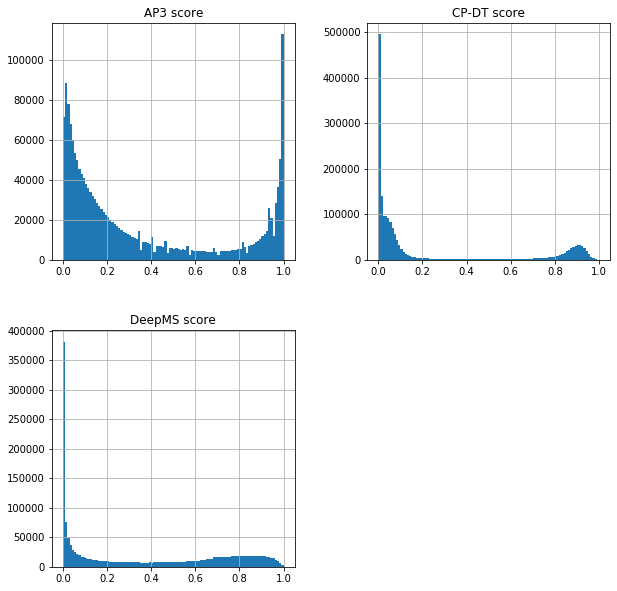

In [11]:
df_database_AA_8_30.hist(column = ['AP3 score', 'CP-DT score', 'DeepMS score'], bins = 100, figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107CFE54EC8>,
      dtype=object)

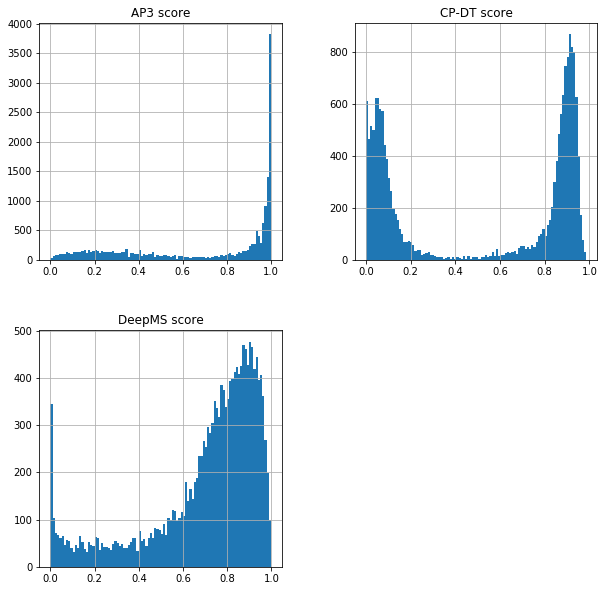

In [12]:
df_idenpep.hist(column = ['AP3 score', 'CP-DT score', 'DeepMS score'], bins = 100, figsize = (10,10))

## Difference in score based on length

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107D5558F48>,
      dtype=object)

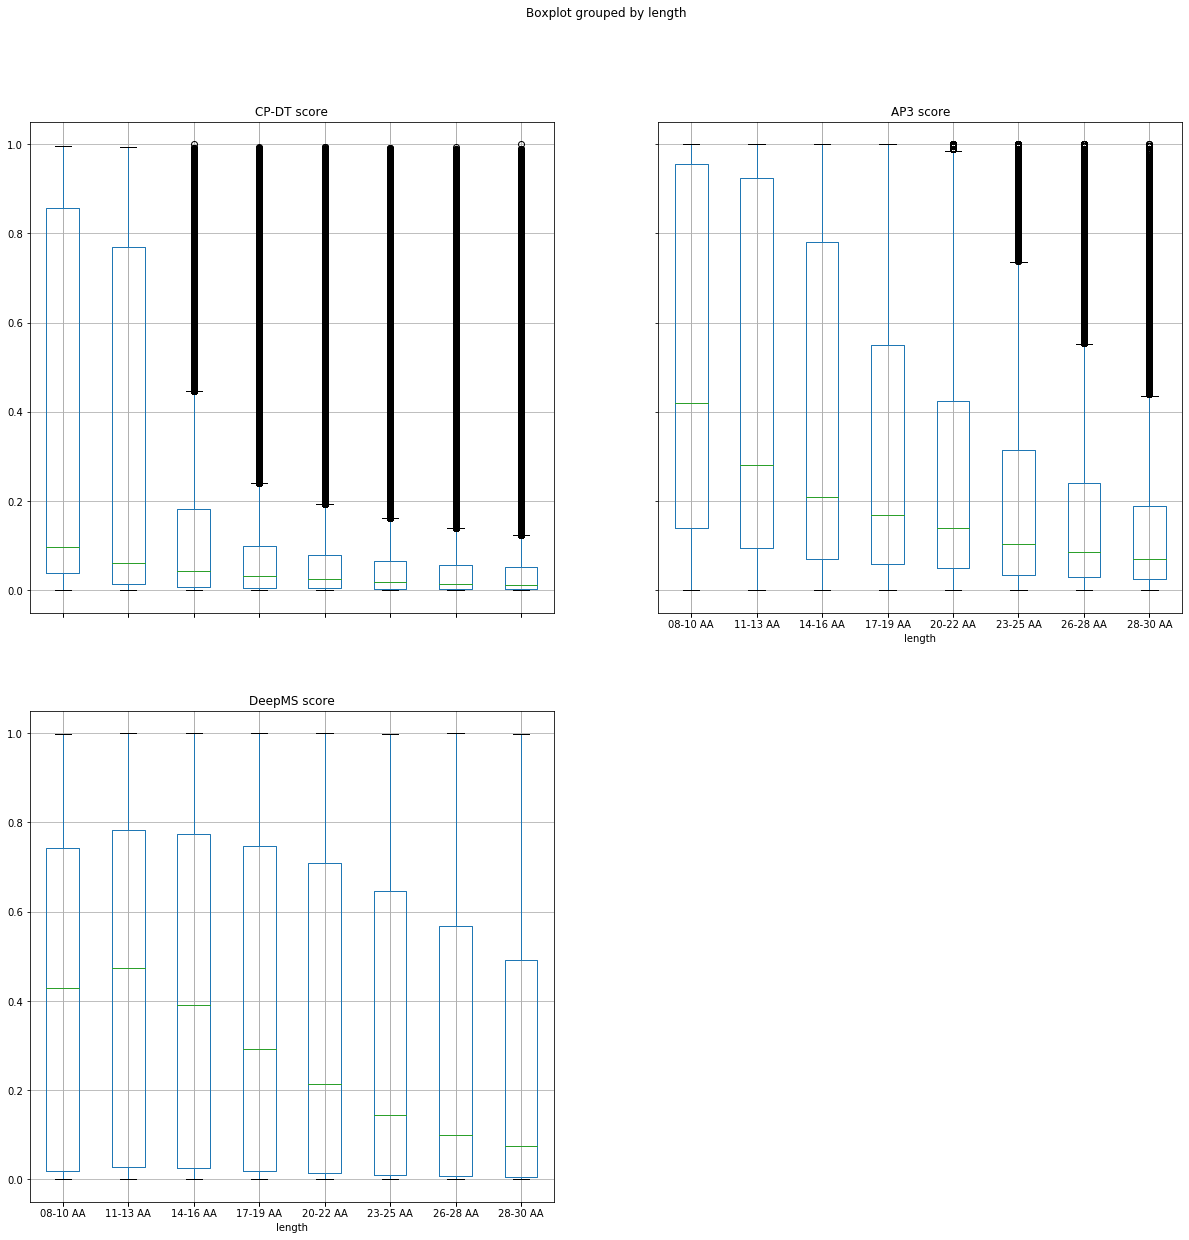

In [13]:
df_database_AA_8_30.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'length', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107D531CE88>,
      dtype=object)

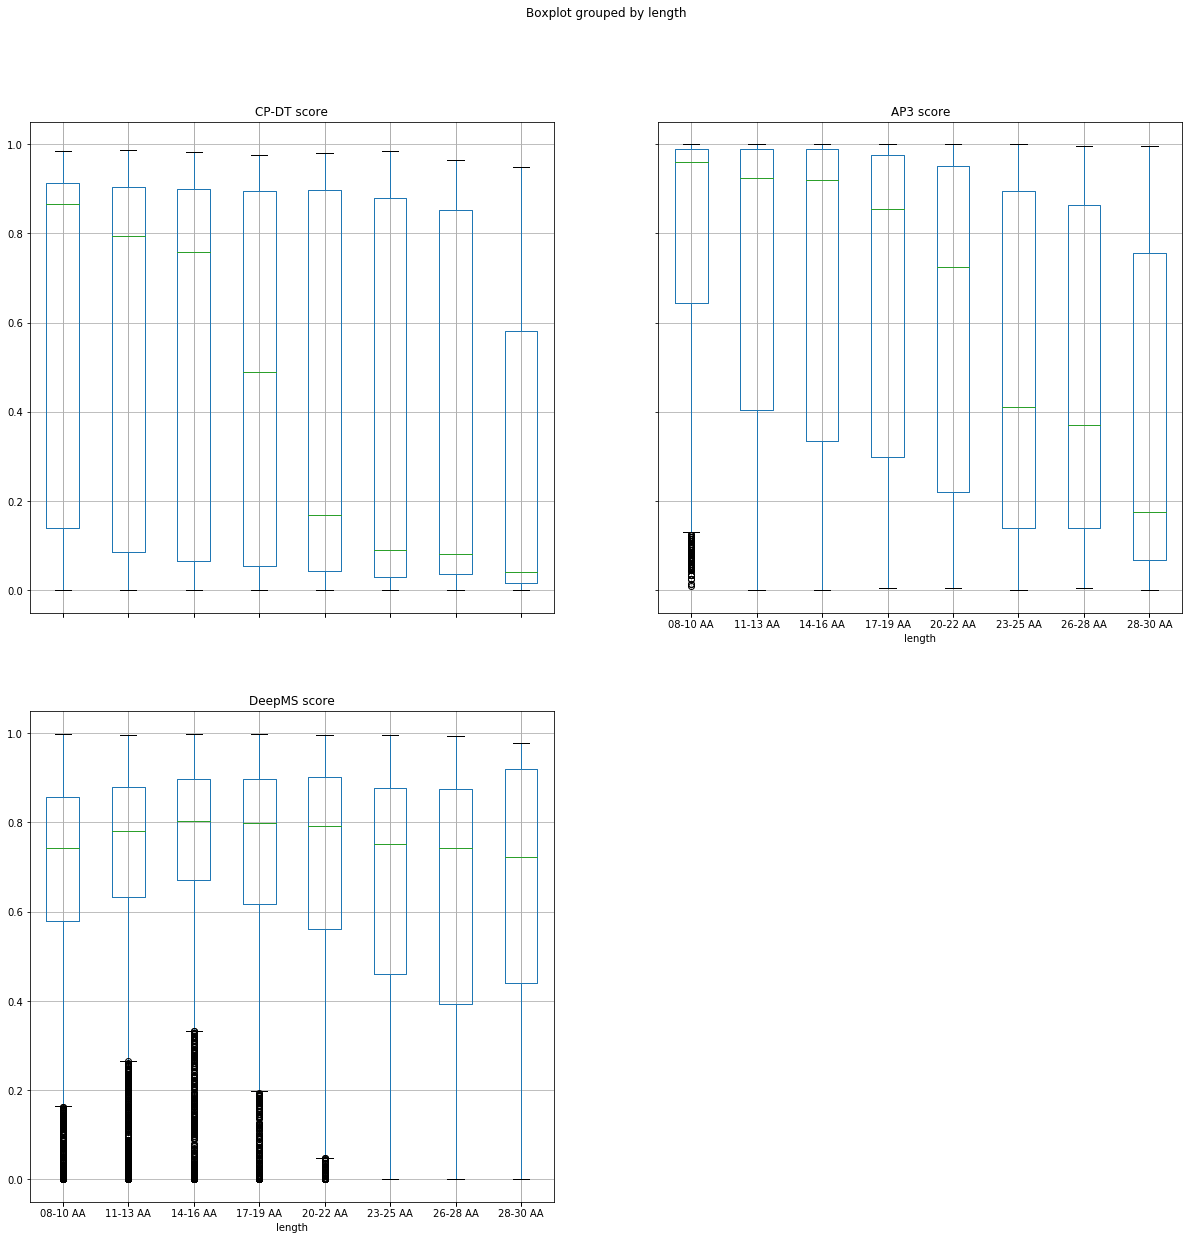

In [14]:
df_idenpep.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'length', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107D53D72C8>,
      dtype=object)

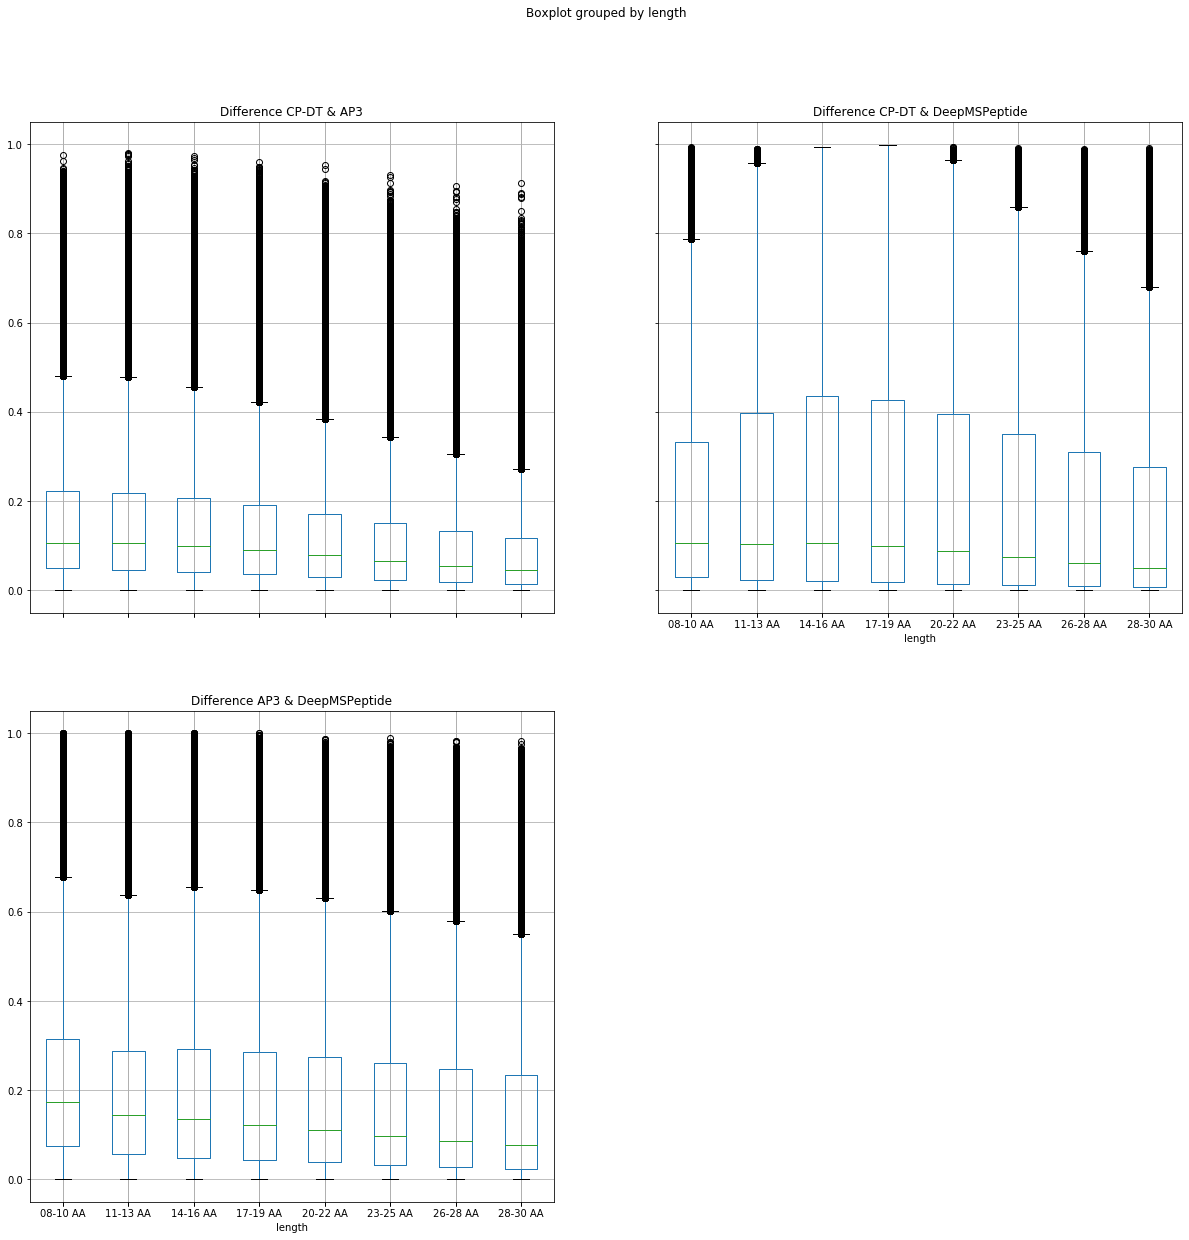

In [15]:
df_database_AA_8_30.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'length', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107D53EE708>,
      dtype=object)

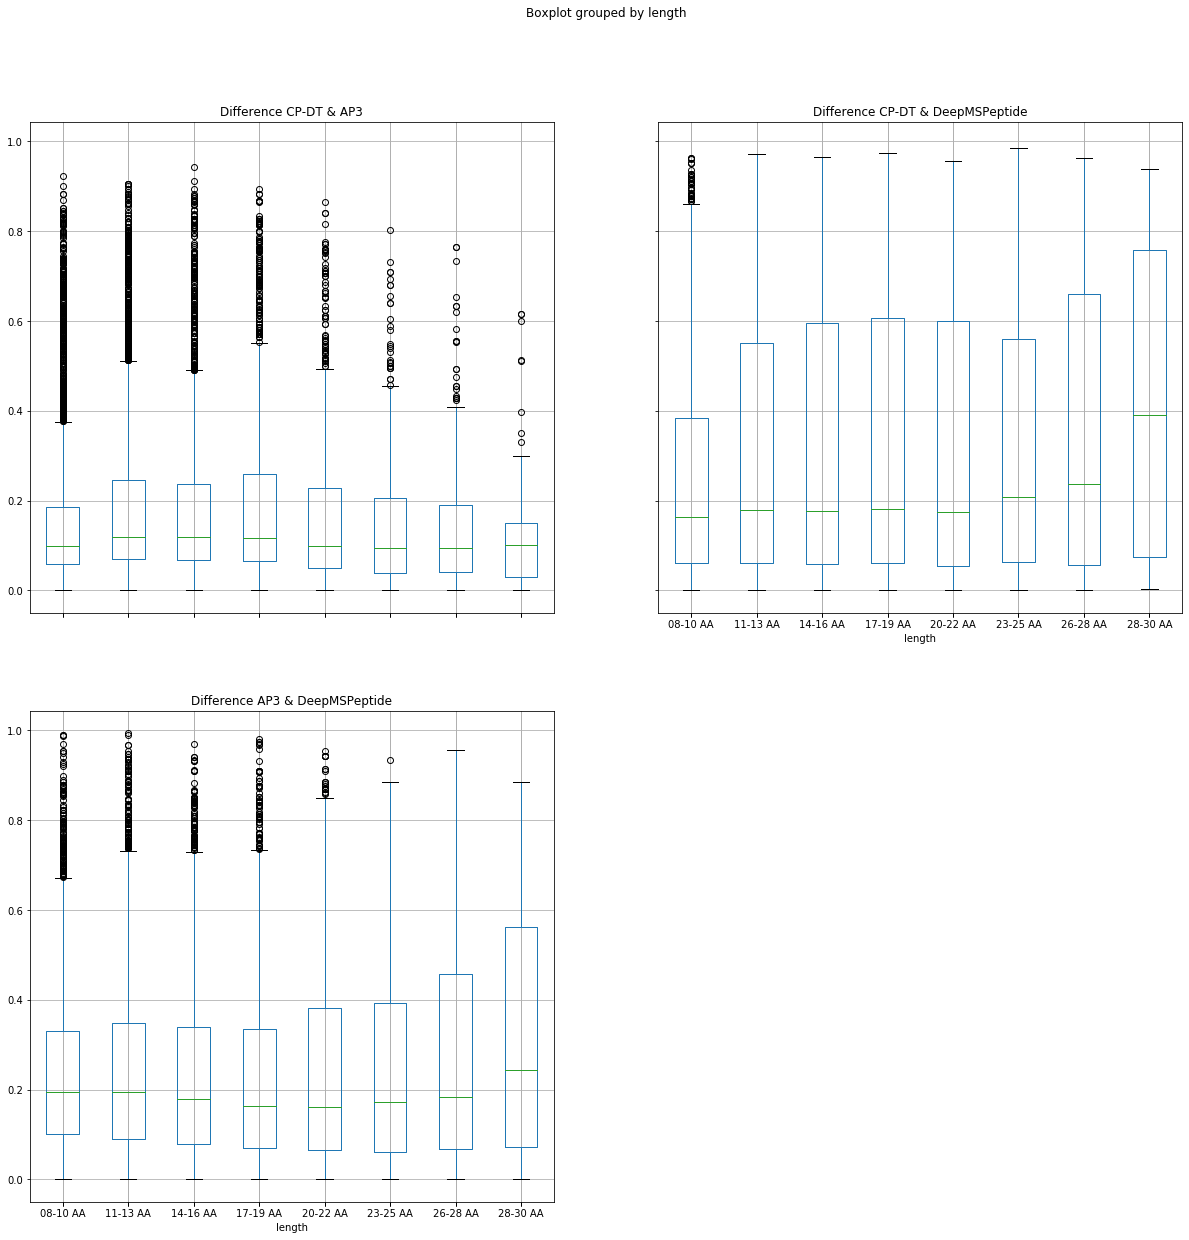

In [16]:
df_idenpep.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'length', figsize = (20,20))

## Difference in score based on miscleavage

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107E49D7388>,
      dtype=object)

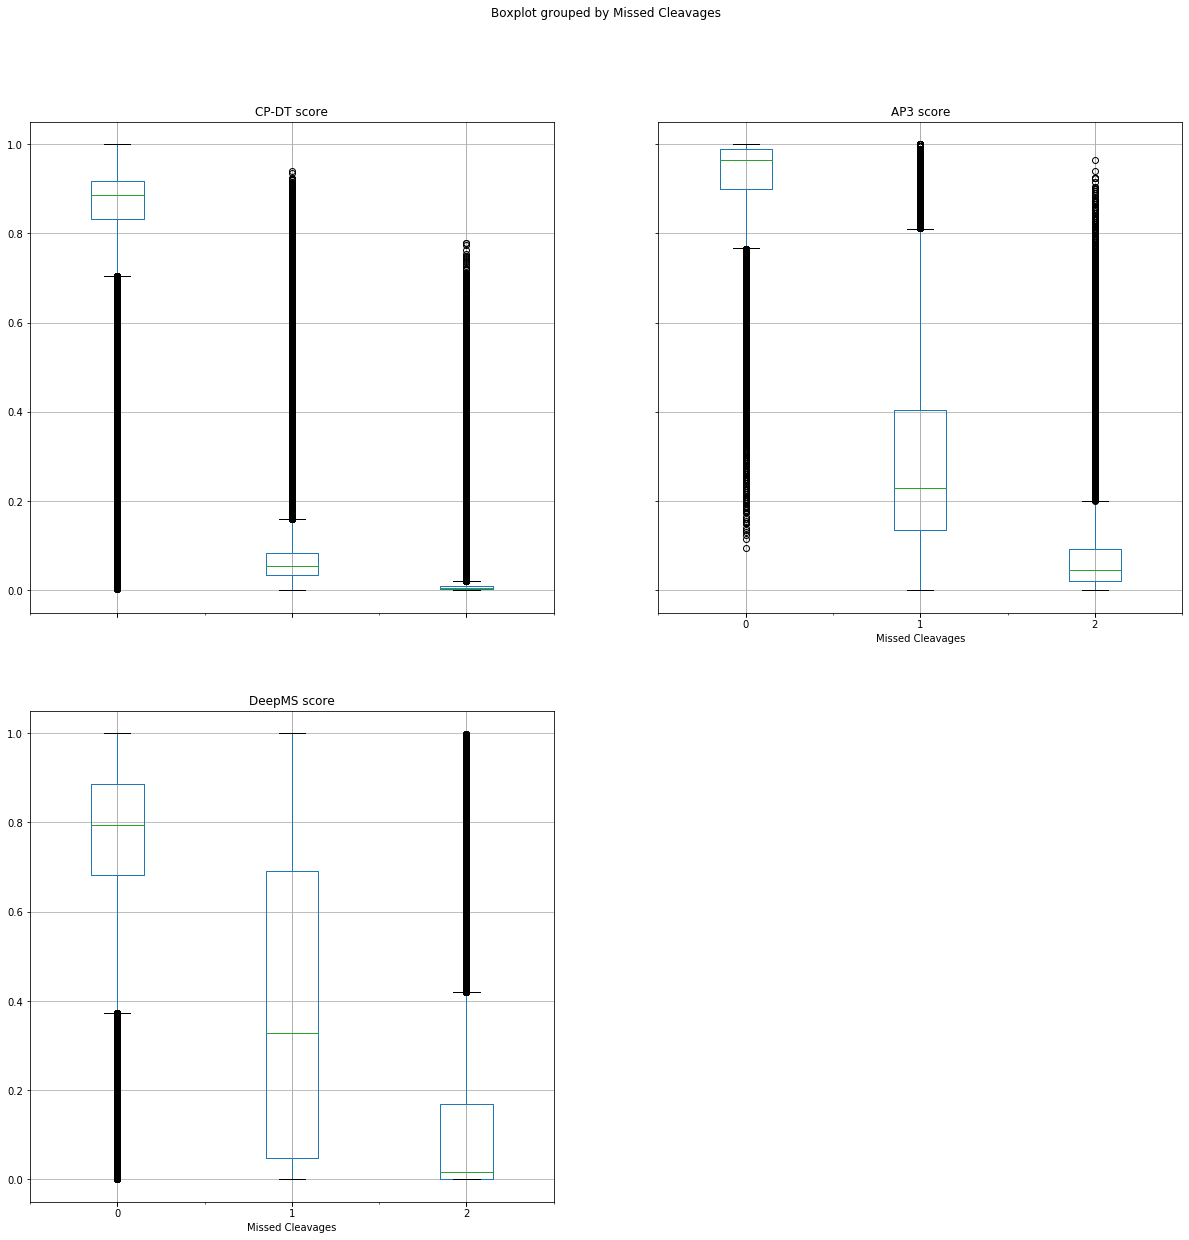

In [17]:
df_database_AA_8_30.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'Missed Cleavages', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107E49D76C8>,
      dtype=object)

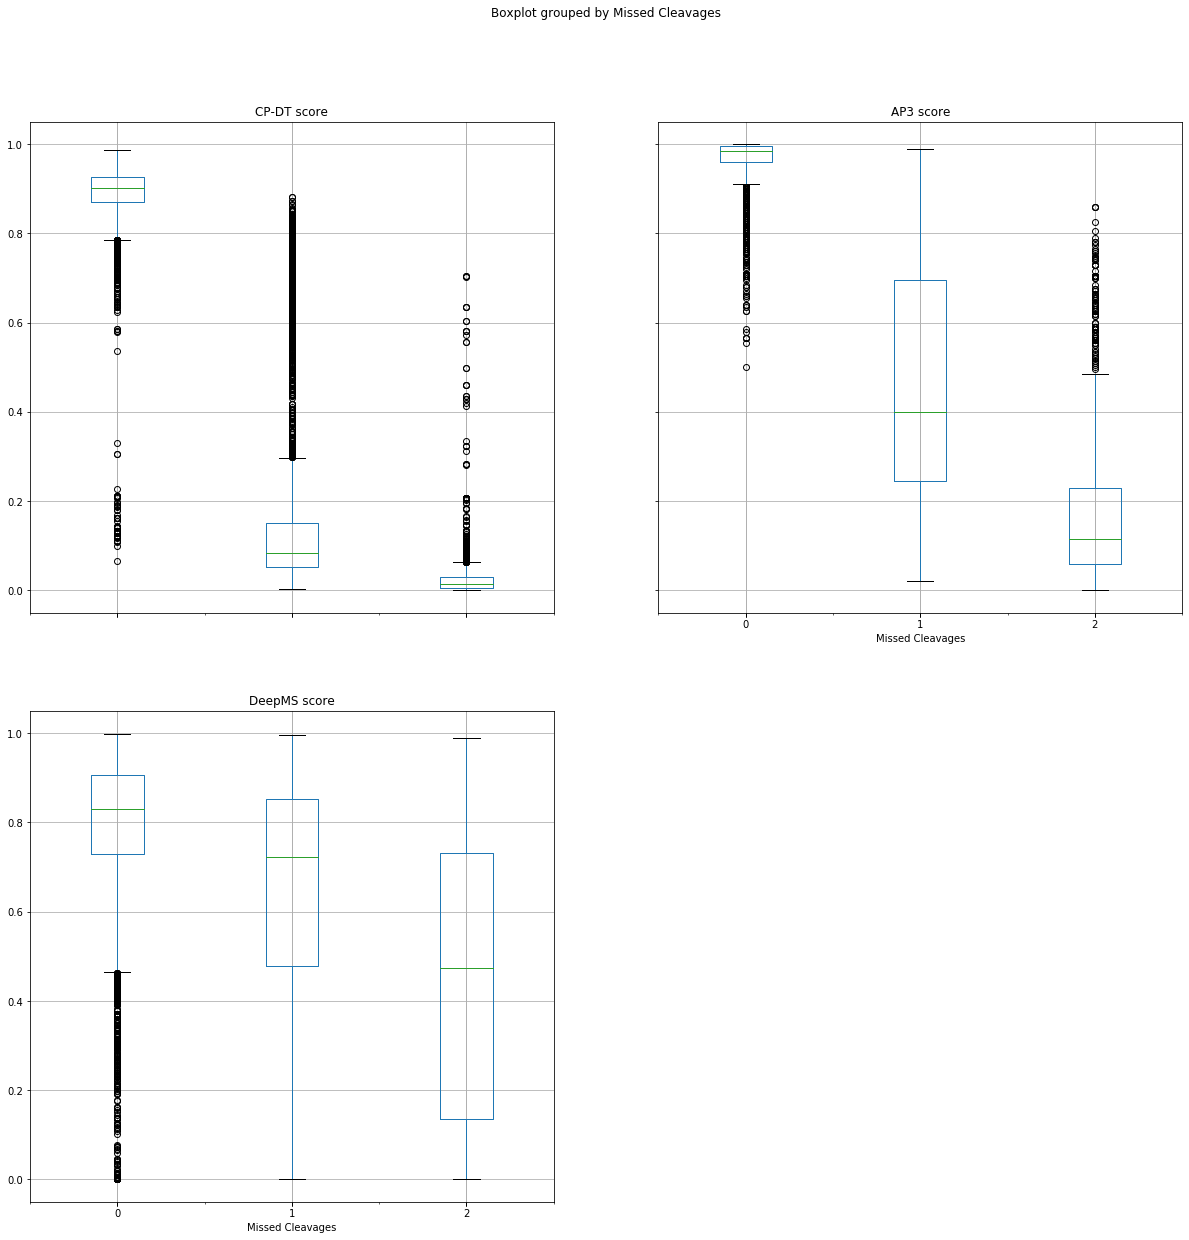

In [18]:
df_idenpep.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'Missed Cleavages', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107E464D148>,
      dtype=object)

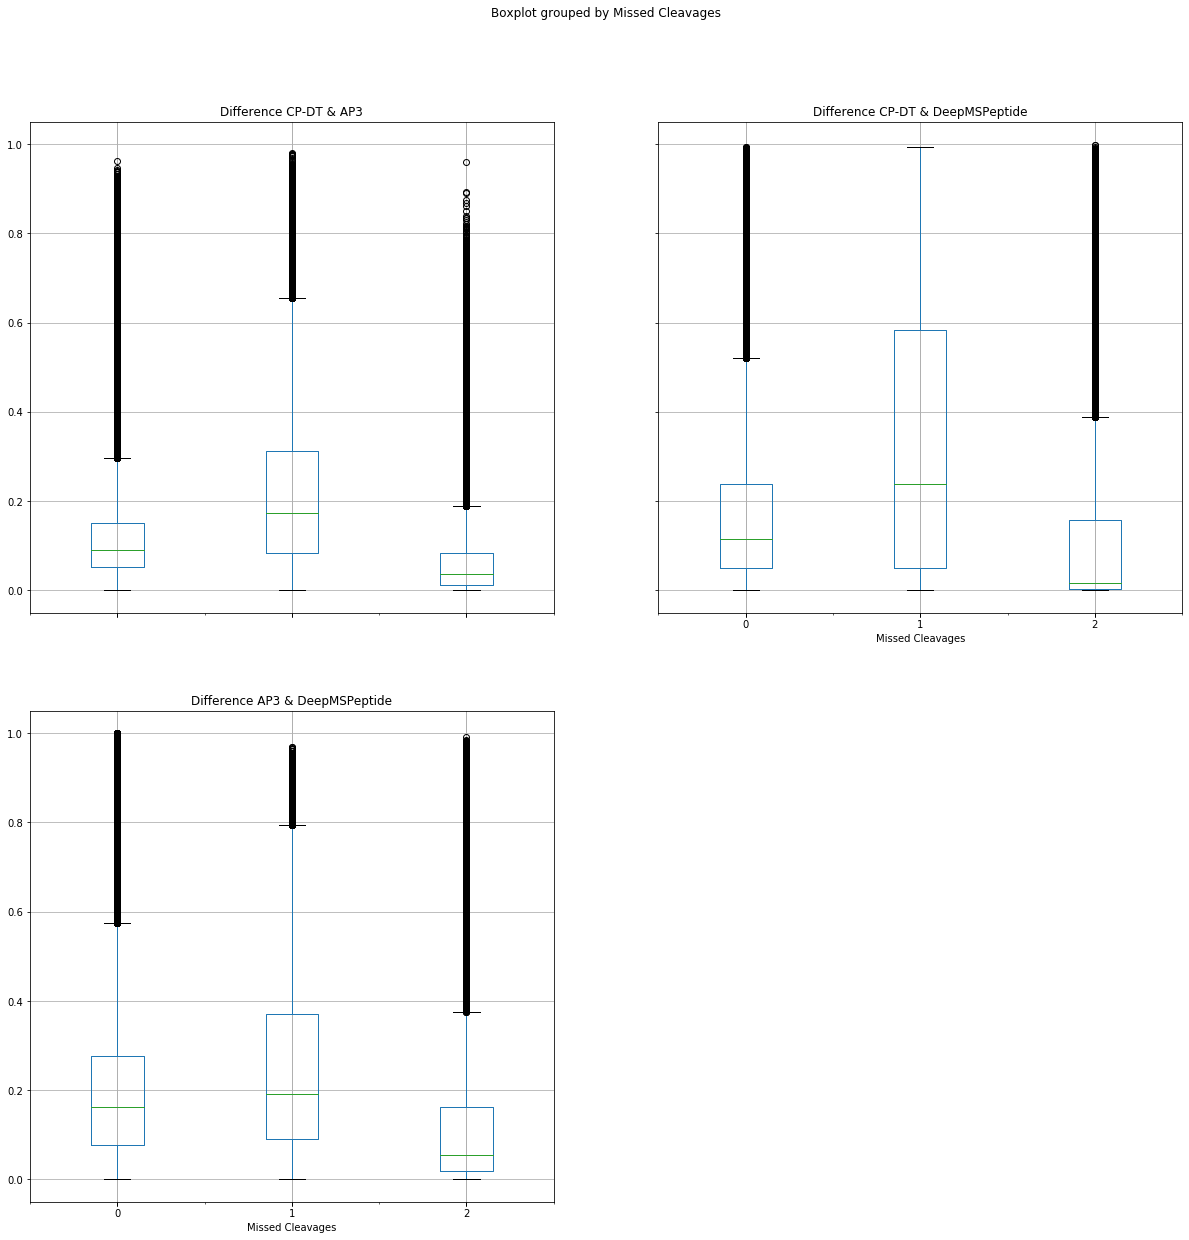

In [19]:
df_database_AA_8_30.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'Missed Cleavages', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107E48A8748>,
      dtype=object)

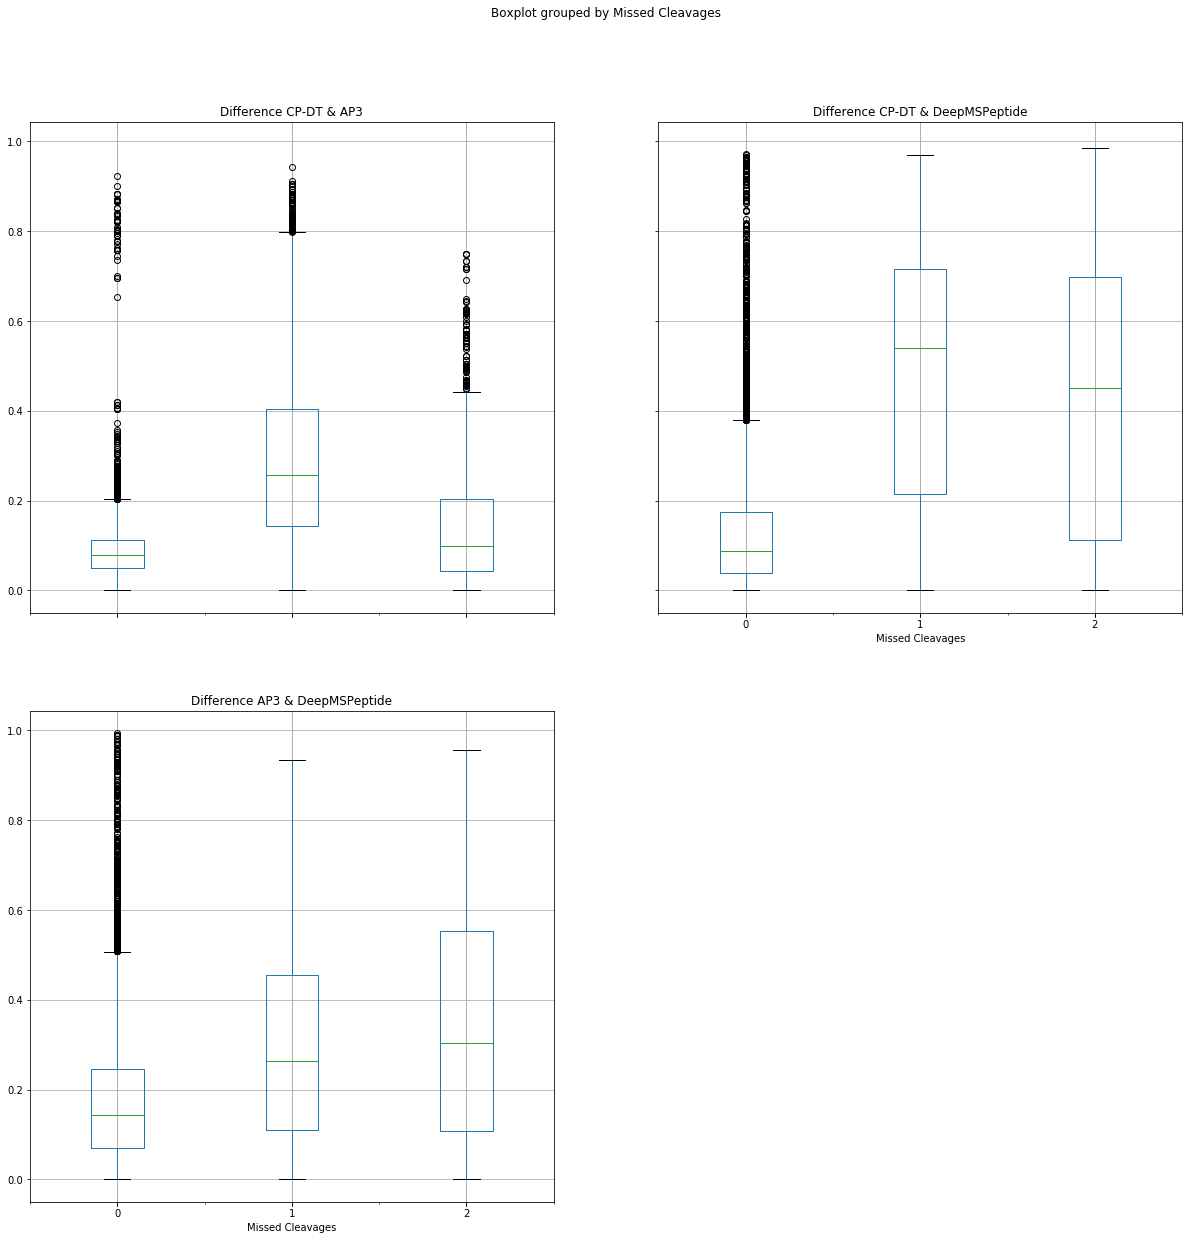

In [20]:
df_idenpep.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'Missed Cleavages', figsize = (20,20))

## Difference in score based on Hydrophobicity

In [21]:
hydro_dblist = []
for hydro in df_database_AA_8_30.Hydrophobicity:
    if hydro > 0:
        hydro_dblist.append('Hydrophobic')
    else:
        hydro_dblist.append('Hydrophilic')

hydro_iplist = []    
for hydro in df_idenpep.Hydrophobicity:
    if hydro > 0:
        hydro_iplist.append('Hydrophobic')
    else:
        hydro_iplist.append('Hydrophilic')
        
df_database_AA_8_30.insert(2, 'Hydrophobic/Hydrophilic', hydro_dblist)
df_idenpep.insert(2, 'Hydrophobic/Hydrophilic', hydro_iplist)

df_idenpep.head()

,Protein ID,Peptide,Hydrophobic/Hydrophilic,Hydrophobicity,Missed Cleavages,length,CP-DT score,DeepMS score,AP3 score,Difference CP-DT & AP3,Difference CP-DT & DeepMSPeptide,Difference AP3 & DeepMSPeptide
266401,Q8A412,NIQEISNEFGFPNASYFGTFFKK,Hydrophilic,-10.0,1,23-25 AA,0.048218,0.850242,0.1550,0.106782,0.802024,0.695242
1494201,P0ABB4,GLDVKDLEHPIEVPVGK,Hydrophilic,-4.3,1,17-19 AA,0.124313,0.224281,0.4125,0.288187,0.099968,0.188219
235670,Q8A9U7,AIEETAAMVAK,Hydrophobic,6.2,0,11-13 AA,0.951897,0.636753,0.9850,0.033103,0.315144,0.348247
311322,Q8A738,GTFHTSFK,Hydrophilic,-4.1,0,08-10 AA,0.920731,0.441848,0.9450,0.024269,0.478883,0.503152
343425,Q8AAP6,GFNAVPTVPMVPESQLDDMRNR,Hydrophilic,-11.9,1,20-22 AA,0.023568,0.884265,0.3300,0.306432,0.860697,0.554265


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107FA085408>,
      dtype=object)

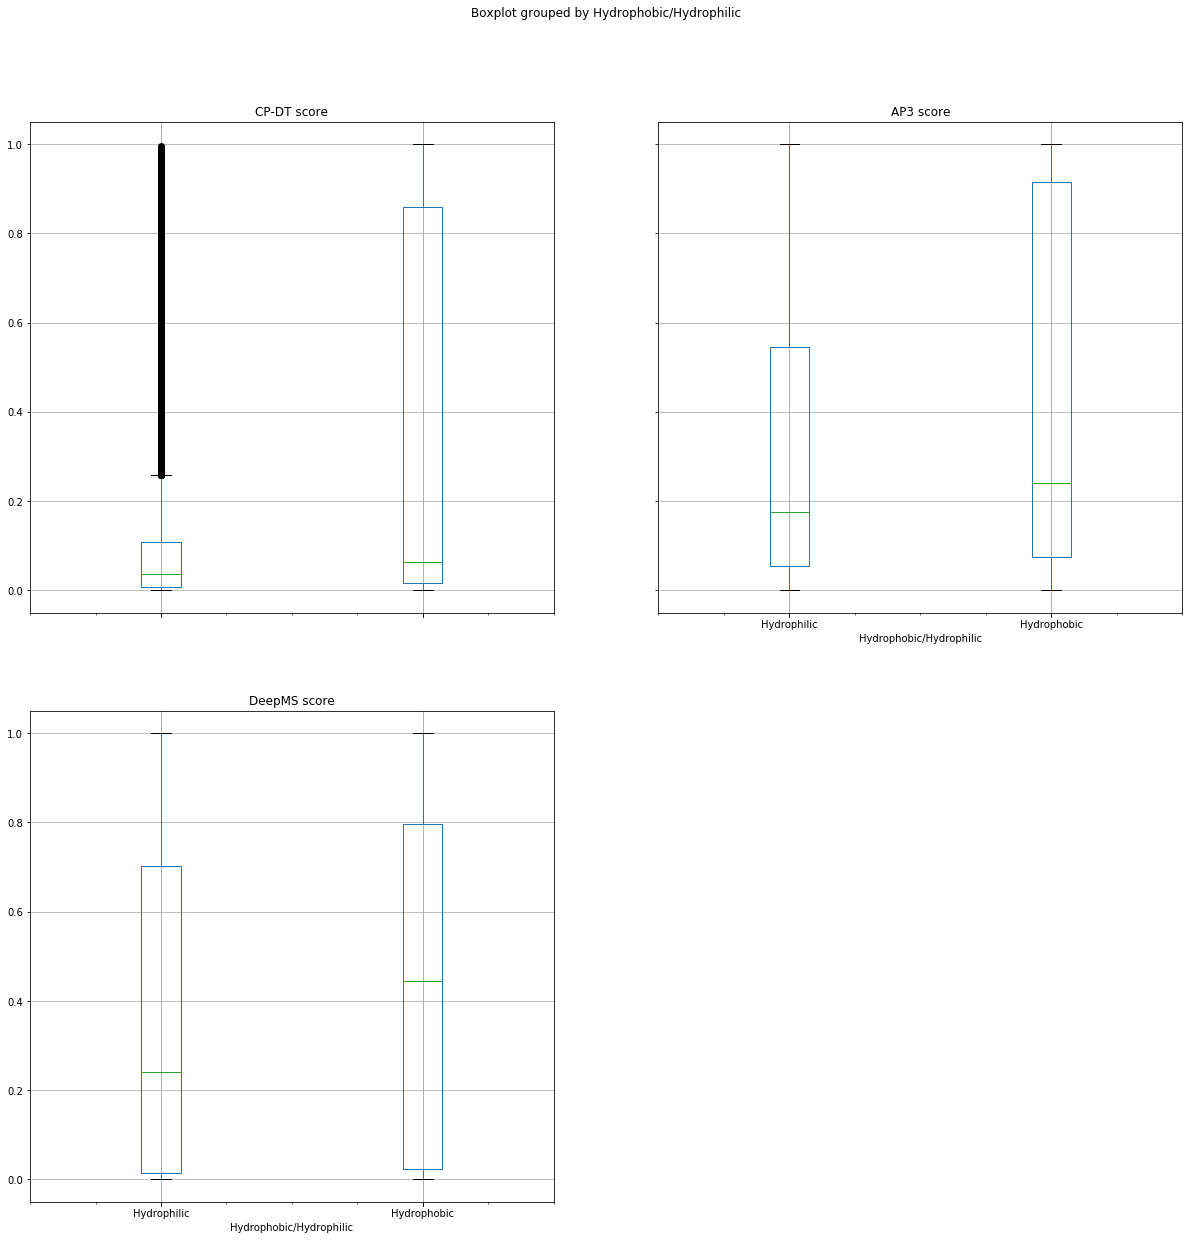

In [22]:
df_database_AA_8_30.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'Hydrophobic/Hydrophilic', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107FA0D1548>,
      dtype=object)

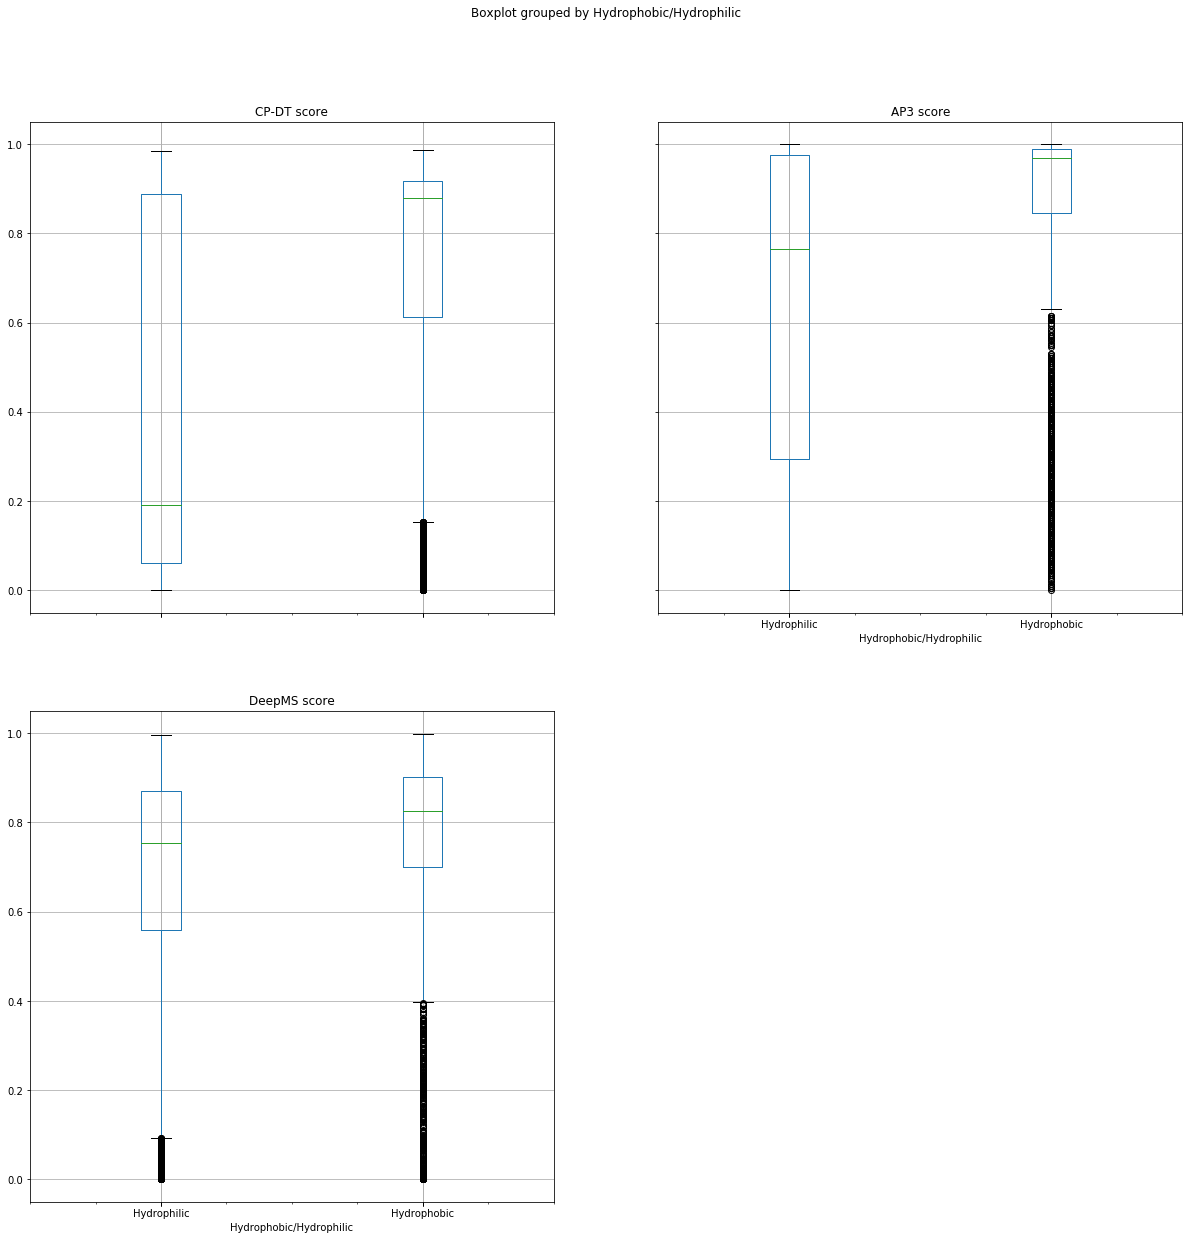

In [23]:
df_idenpep.boxplot(column = ['CP-DT score', 'AP3 score', 'DeepMS score'], by = 'Hydrophobic/Hydrophilic', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107E7836848>,
      dtype=object)

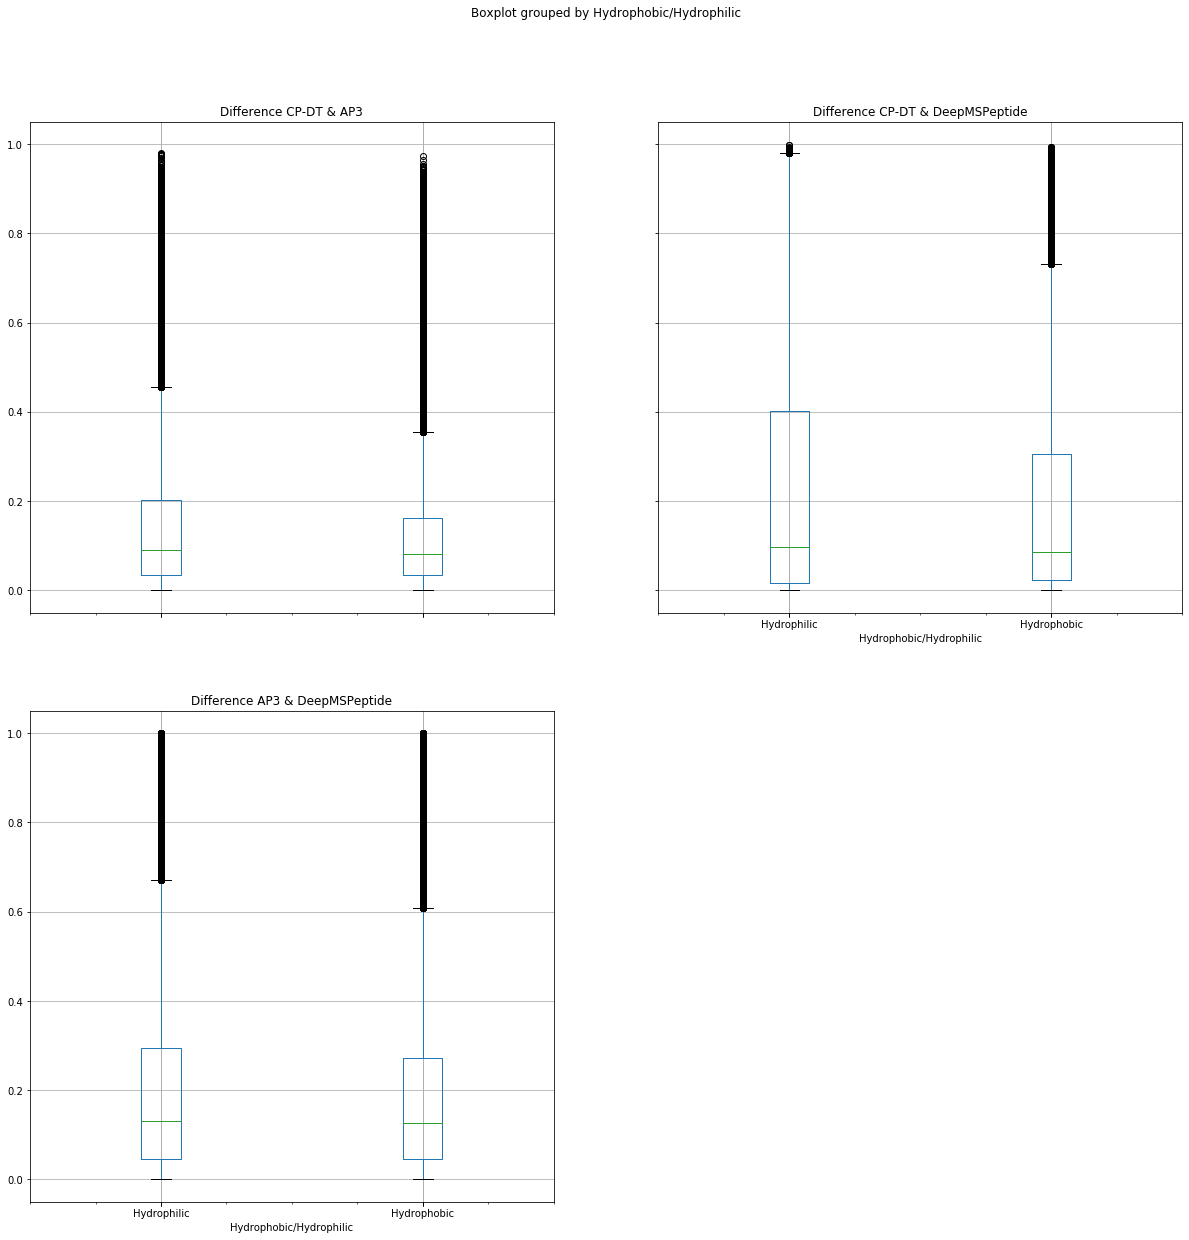

In [24]:
df_database_AA_8_30.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'Hydrophobic/Hydrophilic', figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000107E6B826C8>,
      dtype=object)

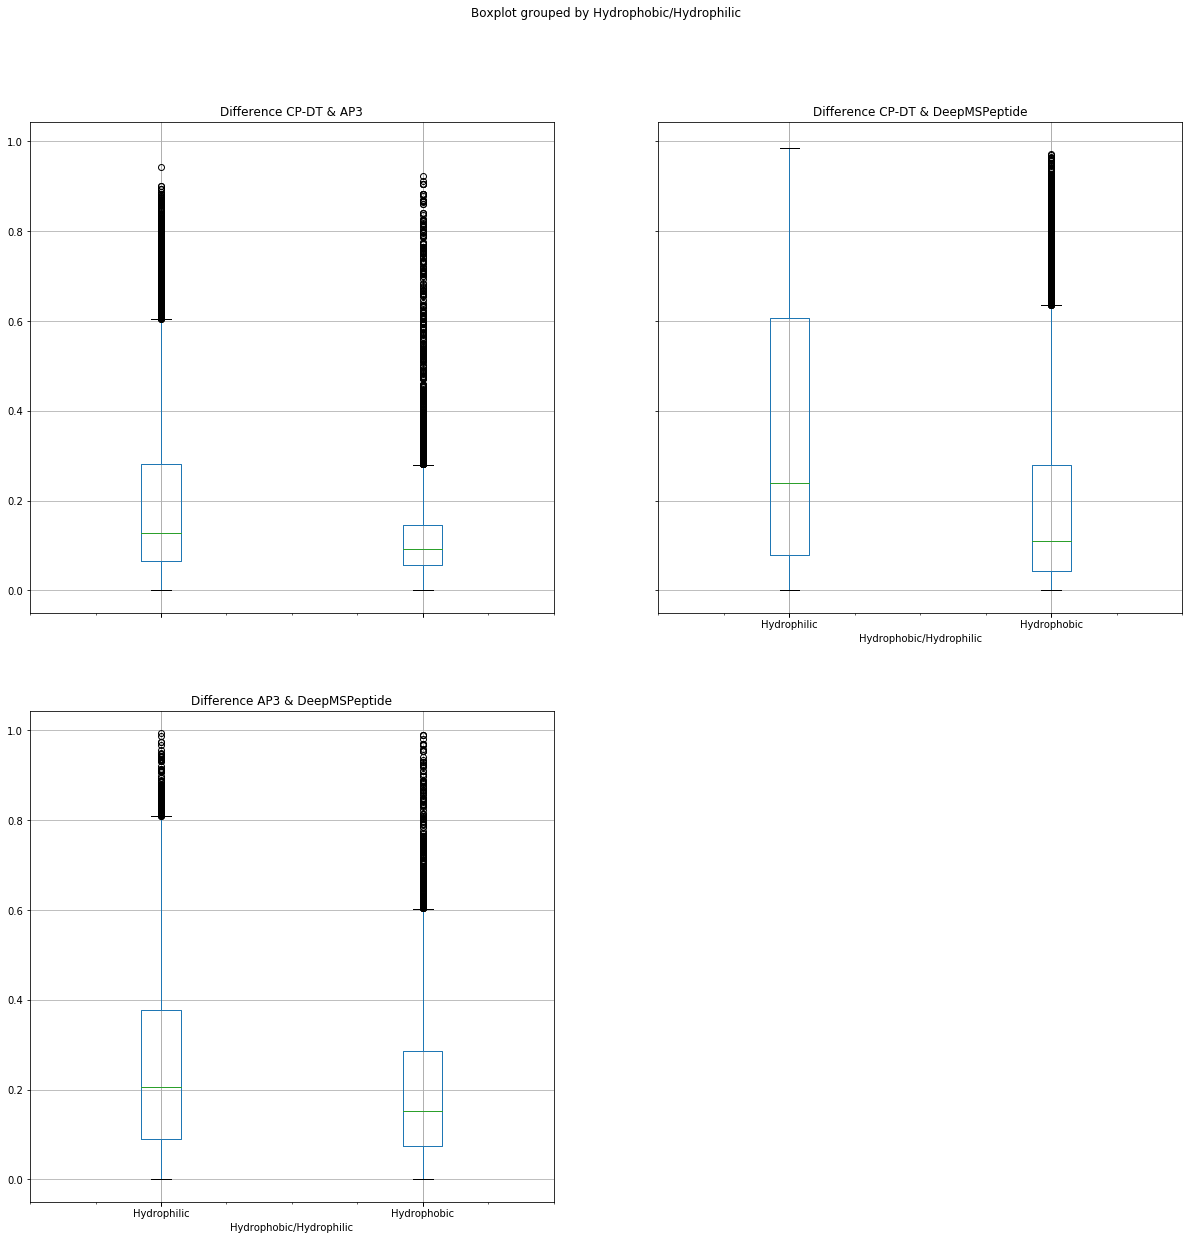

In [25]:
df_idenpep.boxplot(column = ['Difference CP-DT & AP3', 'Difference CP-DT & DeepMSPeptide', 'Difference AP3 & DeepMSPeptide'], by = 'Hydrophobic/Hydrophilic', figsize = (20,20))

# Which predictor could lead to significant database reduction?

In this section we will do an experiment to test how many of the identified peptides we can recover if we take a certain percentage of the highest scoring peptides in the database for each predictor

## CP-DT

In [26]:
percentage = 1.00

for n in range(20):
    percentage -= 0.05
    percentage = round(percentage, 2)
    df_top_perc = df_database_AA_8_30[df_database_AA_8_30['CP-DT score'] >= df_database_AA_8_30['CP-DT score'].quantile(percentage)]
    
    df_iden = pd.DataFrame()
    
    # Look back at part where we determine the amount of identified peptides available in the database
    # max recovery can be 95,35% because 16874 out of 17697 peptides are available in the database
    for header, seq in head_seq:
        try:
            df_iden = df_iden.append(df_top_perc[df_top_perc['Protein ID'] == header][df_top_perc['Peptide'] == seq])
        except:
            continue
    
    db_size = (1 - percentage) * 100
    recovery = (len(df_iden.Peptide)/len(iden_pept)) * 100
    threshold = min(df_top_perc['CP-DT score'])
    
    print(db_size, recovery, threshold)

C:\Users\compomics\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


5.000000000000004 13.838503701192293 0.922884
9.999999999999998 26.90851556761033 0.895352
15.000000000000002 38.67322144996327 0.861679
19.999999999999996 47.90077414251003 0.780732
25.0 55.96993840763971 0.198395
30.000000000000004 63.81307566254167 0.102931
35.0 69.24337458326269 0.0792441
40.0 74.08035260213596 0.0647106
44.99999999999999 78.00757190484264 0.0535045
50.0 81.39797705825846 0.0437753
55.00000000000001 84.36458156749732 0.0346374
60.0 86.99214556139458 0.0255899
65.0 89.32022376674013 0.0168621
70.0 90.94196756512403 0.0109534
75.0 92.08340396677403 0.0077013
80.0 92.80103972424705 0.0055915
85.0 93.51302480646437 0.0040208
90.0 94.00463355370967 0.00273113
95.0 94.53014635248913 0.00157203
100.0 94.7109679606713 5.19505e-06


## DeepMSPeptide

In [27]:
percentage = 1.00

for n in range(20):
    percentage -= 0.05
    percentage = round(percentage, 2)
    df_top_perc = df_database_AA_8_30[df_database_AA_8_30['DeepMS score'] >= df_database_AA_8_30['DeepMS score'].quantile(percentage)]    

    df_iden = pd.DataFrame()
    
    # Look back at part where we determine the amount of identified peptides available in the database
    # max recovery can be 95,35% because 16874 out of 17697 peptides are available in the database
    for header, seq in head_seq:
        try:
            df_iden = df_iden.append(df_top_perc[df_top_perc['Protein ID'] == header][df_top_perc['Peptide'] == seq])
        except:
            continue
    
    db_size = (1 - percentage) * 100
    recovery = (len(df_iden.Peptide)/len(iden_pept)) * 100
    threshold = min(df_top_perc['DeepMS score'])
    
    print(db_size, recovery, threshold)

C:\Users\compomics\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


5.000000000000004 13.13216929423066 0.92520544
9.999999999999998 25.105950161044245 0.87770912
15.000000000000002 36.29993784257219 0.83163065
19.999999999999996 46.22817426682489 0.78448227
25.0 56.03774651070803 0.73528355
30.000000000000004 64.15211617788326 0.68301696
35.0 71.22676159801095 0.61344674
40.0 76.9678476577951 0.51880306
44.99999999999999 81.35277165621292 0.4050448
50.0 84.64146465502628 0.28851519999999997
55.00000000000001 87.34813810250324 0.18791769999999997
60.0 89.32587444199582 0.1124929
65.0 90.63118042606091 0.06253076000000002
70.0 91.71611007515398 0.03252624999999998
75.0 92.37723908007007 0.015717149999999958
80.0 93.02141605921908 0.006852749999999963
85.0 93.42261400237328 0.0025741000000000236
90.0 93.84076397129458 0.0007301600000000352
95.0 94.14024975984631 0.00010419999999999874
100.0 94.7109679606713 0.0


## AP3

In [28]:
percentage = 1.00

for n in range(20):
    percentage -= 0.05
    percentage = round(percentage, 2)
    df_top_perc = df_database_AA_8_30[df_database_AA_8_30['AP3 score'] >= df_database_AA_8_30['AP3 score'].quantile(percentage)]
    
    df_iden = pd.DataFrame()

    # Look back at part where we determine the amount of identified peptides available in the database
    # max recovery can be 95,35% because 16874 out of 17697 peptides are available in the database
    for header, seq in head_seq:
        try:
            df_iden = df_iden.append(df_top_perc[df_top_perc['Protein ID'] == header][df_top_perc['Peptide'] == seq])
        except:
            continue
    
    db_size = (1 - percentage) * 100
    recovery = (len(df_iden.Peptide)/len(iden_pept)) * 100
    threshold = min(df_top_perc['AP3 score'])
    
    print(db_size, recovery, threshold)

C:\Users\compomics\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


5.000000000000004 21.574278126236084 0.99
9.999999999999998 32.12973950387072 0.975
15.000000000000002 42.87167316494321 0.94
19.999999999999996 51.53980900717636 0.87
25.0 58.083290953268914 0.71
30.000000000000004 63.553144600779795 0.51
35.0 70.07402384584958 0.38
40.0 75.73600045205401 0.295
44.99999999999999 80.08702039893767 0.235
50.0 83.60174040797875 0.19
55.00000000000001 86.37057128326835 0.155
60.0 88.7777589421936 0.125
65.0 90.56337232299259 0.1
70.0 91.75566480194384 0.08
75.0 93.004464033452 0.06
80.0 93.85206532180595 0.045
85.0 94.46233824942081 0.03
90.0 94.8748375430864 0.02
95.0 95.18562468214952 0.01
100.0 95.34949426456461 0.0
